# Correlating cell shapes & plotting heatmaps of preferred tuning across learning
### Varex per comp is used to filter 

In [1]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils
from scipy.stats import pearsonr
from copy import deepcopy

In [1]:
meta

NameError: name 'meta' is not defined

In [2]:
# set parameters for running GLM
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

rank_level_sort = 15

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
    sorted_model, sort_order = utils.sortfactors(out[0])
    model_list.append(sorted_model)
    tensor_list.append(out[2][sort_order[rank_level_sort - 1], :, :])
    id_list.append(out[1][sort_order[rank_level_sort - 1]])
    bhv_list.append(out[4])
    meta_list.append(utils.add_stages_to_meta(out[3], 'parsed_11stage'))

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

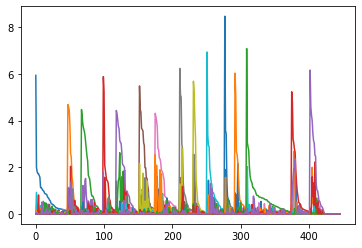

In [14]:
best_cluster = utils.define_high_weight_cell_factors(model_list[0], 15, threshold=1)
cell_factors = model_list[0].results[15][0].factors[0][:, :]
# cell_factors[]
plt.plot(cell_factors)

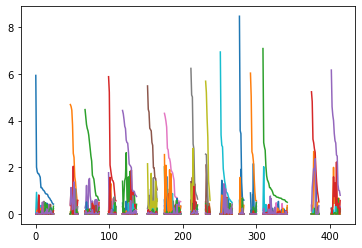

In [16]:
cell_factors[np.isnan(best_cluster), :] = np.nan
plt.plot(cell_factors)

## load variance calcs
- running on beastmode instances now

In [164]:
# checking mice for running on beastmode
mice = cas.lookups.mice['all12'][1:3]
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
print(words)
print(mice)

['horrible', 'horrible']
['AS23', 'AS41']


In [186]:
# component varex

mice = cas.lookups.mice['all12']
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

varex_list = []
for mouse, word in zip(mice, words):
    
    var = cas.calc.var.groupday_varex_bycomp(
        flow.Mouse(mouse),
        trace_type='zscore_day',
        method='ncp_hals',
        cs='',
        warp=False,
        word=word,
        group_by=group_by,
        nan_thresh=0.95,
        score_threshold=0.8,
        rectified=True,
        verbose=False)
    varex_list.append(var)
comp_varex_df = pd.concat(varex_list, axis=0).set_index(['rank', 'component'], append=True)

In [181]:
# all varex

mice = cas.lookups.mice['all12']
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

total_varex_list = []
for mouse, word in zip(mice, words):
    var = cas.calc.var.groupday_varex(
        flow.Mouse(mouse),
        trace_type='zscore_day',
        method='ncp_hals',
        cs='',
        warp=False,
        word=word,
        group_by='all3',
        nan_thresh=0.95,
        score_threshold=0.8,
        rectified=True,
        verbose=False)
    total_varex_list.append(var)
total_varex_df = pd.concat(total_varex_list, axis=0)
total_varex_df_it0 = total_varex_df.loc[total_varex_df.iteration.isin([0])].set_index(['rank'], append=True).drop(columns=['iteration'])
total_varex_df_it0.head()

variance_explained_tcamodel  variance_explained_smoothmodel  \
mouse rank                                                                
AS20  1                        0.076532                        0.782751   
      2                        0.165288                        0.782751   
      3                        0.248928                        0.782751   
      4                        0.276426                        0.782751   
      5                        0.291613                        0.782751   

            variance_explained_meanmodel  variance_explained_meandailymodel  \
mouse rank                                                                    
AS20  1                           0.1107                           0.131112   
      2                           0.1107                           0.131112   
      3                           0.1107                           0.131112   
      4                           0.1107                           0.131112   
      5                           0.1107                           0.131112   

            variance_explained_PCA  
mouse rank                          
AS20  1                   0.464323  
      2                   0.464323  
      3                   0.464323  
      4                   0.464323  
      5                   0.464323

In [199]:
# the value I want --> fraction of variance explained (per comp) out of total variance explained
frac_varex_per_comp = comp_varex_df.variance_explained_tcamodel / total_varex_df_it0.variance_explained_tcamodel
frac_varex_per_comp = frac_varex_per_comp.to_frame().rename(columns={'variance_explained_tcamodel': 'fractional_variance_explained'})
frac_varex_per_comp.head()

fractional_variance_explained
mouse rank component                               
AS20  1    1                               1.001142
      2    1                               0.451758
           2                               0.518110
      3    1                               0.312895
           2                               0.344597

                      fractional_variance_explained
mouse rank component                               
OA26  15   1                               0.051718
           2                               0.041566
           3                               0.045185
           4                               0.101228
           5                               0.088060
           6                               0.123286
           7                               0.025211
           8                               0.111115
           9                               0.111310
           10                              0.111412
           11                              0.131194
           12                              0.083244
           13                              0.048378
           14                              0.049551
           15                              0.022578


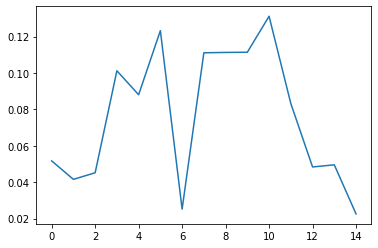

In [200]:
frac_var15 = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([15]).values, :]
print(frac_var15.loc[frac_var15.reset_index()['mouse'].isin(['OA26']).values, :])
plt.plot(frac_var15.loc[frac_var15.reset_index()['mouse'].isin(['OA26']).values, :].values)

- could do distributions of frac varex pooled per rank across mice. 
    - Point being that all of the varex is not coming from one or two components, but is relatively distributed amound components


## how does fractional variance explained (per component) out of total explained variance change as rank increases?

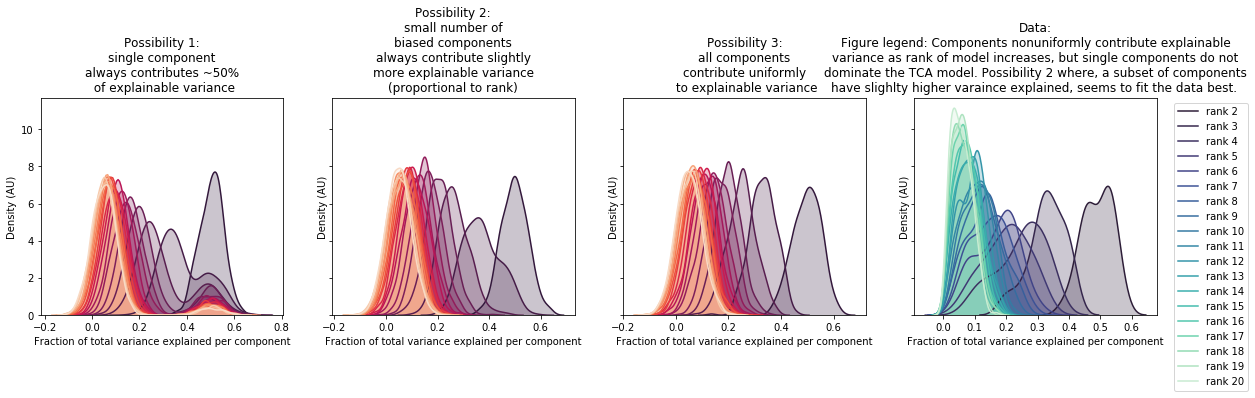

In [613]:
fig, ax = plt.subplots(1,4, figsize=(20,4), sharey=True)
colors = sns.color_palette("mako", 21)
pcolors = sns.color_palette("rocket", 21)

# plot the distribution if a single compoenent always explained a large fraction of the variance 
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    bias50_distributed_result = np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    if rank > 2:
        bias50_distributed_result[:120] = np.random.normal(1.0/2, 0.05, 120)
    sns.kdeplot(bias50_distributed_result, ax=ax[0], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the distribution a few components always explained a slightly larger fraction of the variance 
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    bias50_distributed_result = np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    if rank > 2:
        bias50_distributed_result[:120] = np.random.normal(1.0/rank, 0.05, 120) + np.random.normal(1.0/rank, 0.05, 120)/rank
    sns.kdeplot(bias50_distributed_result, ax=ax[1], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the result if components shared the variance (distributed in a gaussian manner)
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    distributed_result =np.random.normal(1.0/rank, 0.05, len(frac_var_nr)*10)
    sns.kdeplot(np.array(distributed_result), ax=ax[2], cumulative=False, shade=True, color=pcolors[rank], label=f'rank {rank}', legend=False)
    
# plot the actual distributions of variances explained
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    sns.kdeplot(frac_var_nr.values.flatten(), ax=ax[3], cumulative=False, shade=True, color=colors[rank], label=f'rank {rank}')

# add x and y labels
for axi in ax:
    axi.set_xlabel('Fraction of total variance explained per component')
    axi.set_ylabel('Density (AU)')

# titles and legends
ax[0].set_title('Possibility 1:\nsingle component\nalways contributes ~50%\n of explainable variance')
ax[1].set_title('Possibility 2:\nsmall number of\nbiased components\nalways contribute slightly\nmore explainable variance\n(proportional to rank)')
ax[2].set_title('Possibility 3:\nall components\ncontribute uniformly\n to explainable variance')
ax[3].set_title('Data:\nFigure legend: Components nonuniformly contribute explainable\n' \
               'variance as rank of model increases, but single components do not\n' \
               'dominate the TCA model. Possibility 2 where, a subset of components\n'\
               'have slighlty higher varaince explained, seems to fit the data best. ')
ax[3].legend(bbox_to_anchor=(1.05, 1))

plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/kde_explainable_variance_by_component.png', bbox_inches='tight')
plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/kde_explainable_variance_by_component.pdf', bbox_inches='tight')

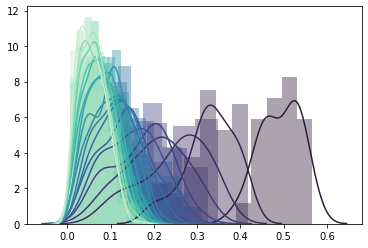

In [349]:
# could plot last panel as distplot to make it clearer that this is real data
for rank in range(2,21):
    frac_var_nr = frac_varex_per_comp.loc[frac_varex_per_comp.reset_index()['rank'].isin([rank]).values, :]
    sns.distplot(frac_var_nr.values.flatten(), kde=True, color=colors[rank], label=f'rank {rank}')

# organize data into matrices with averages taken across stages of learning

In [3]:
# get tuning of each cell first
tuning_list = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='cond')
    tuning_list.append(df)
# cell_tuning = pd.concat(tuning_list, axis=0)

s:\twophoton_analysis\code\cascade\cascade\utils.py:1448: RuntimeWarning: All-NaN slice encountered
  above_thresh = ~np.isnan(np.nanmax(weights, axis=1))
s:\twophoton_analysis\code\cascade\cascade\tuning.py:71: RuntimeWarning: Mean of empty slice
  trial_avg_vec = np.nanmean(cell_mat, axis=0)
s:\twophoton_analysis\code\cascade\cascade\tuning.py:349: RuntimeWarning: Mean of empty slice
  mean_cue.append(np.nanmean(rect_trial_avg_vec[cue_boo]))
s:\twophoton_analysis\code\cascade\cascade\tuning.py:401: RuntimeWarning: Mean of empty slice
  mean_cue.append(np.nanmean(rect_trial_avg_vec[cue_boo]))


In [ ]:
tuning_list_init = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='initial')
    tuning_list_init.append(df)
    
tuning_list_ori = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='orientation')
    tuning_list_ori.append(df)

[autoreload of cascade.stability failed: Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "D:\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "D:\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "D:\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "s:\twophoton_analysis\code\cascade\cascade\stability.py", line 17
    continue
    ^
SyntaxError:

In [46]:
tuning_list[0].head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning    minus-neutral   
      1        L1 reversal1            minus   
      1         L2 learning       plus-minus   
      1        L2 reversal1            broad   
      1         L3 learning            minus   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.22195272423734047, 0.4477677659532566, 0.70...   
      1       [0.13351864981687445, 0.6820032732791814, 0.61...   
      1       [0.49194837333803276, 0.6623026712331795, 0.20...   
      1       [0.41818581075125427, 0.39920909687078043, 0.4...   
      1       [0.06984632071265451, 0.7813822357287312, 0.70...   

                                                  mean response  \
mouse cell_n                                                      
AS20  1       [0.8102384683903909, 0.253379828377761, 0.1496...   
      1       [0.9439842162454425, 0.1955947896692426, 0.367...   
      1       [0.32479159592600865, 0.3200015469668996, 0.84...   
      1       [0.7500456289082826, 0.792864301511142, 0.7584...   
      1       [0.815679012100353, 0.03626748304838481, 0.125...   

              best component  offset component  offset cell  \
mouse cell_n                                                  
AS20  1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   

              component participation  offset participation  
mouse cell_n                                                 
AS20  1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True

In [900]:
tuning_list_ori[0].head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning            270-0   
      1        L1 reversal1              270   
      1         L2 learning          135-270   
      1        L2 reversal1            broad   
      1         L3 learning              270   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.4477677659532566, 0.7005304750762662, 0.221...   
      1       [0.6151777662612606, 0.6820032732791814, 0.133...   
      1       [0.6623026712331795, 0.20763388588993592, 0.49...   
      1       [0.4517823973037701, 0.39920909687078043, 0.41...   
      1       [0.7813822357287312, 0.7050077864531914, 0.069...   

                                                  mean response  \
mouse cell_n                                                      
AS20  1       [0.253379828377761, 0.1496475423868401, 0.8102...   
      1       [0.3674957111304939, 0.1955947896692426, 0.943...   
      1       [0.3200015469668996, 0.8496476387965015, 0.324...   
      1       [0.7584565513921299, 0.792864301511142, 0.7500...   
      1       [0.03626748304838481, 0.12528537430526304, 0.8...   

              best component  offset component  offset cell  \
mouse cell_n                                                  
AS20  1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   

              component participation  offset participation  
mouse cell_n                                                 
AS20  1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True

In [428]:
# loop over tensor, averaging different periods of time for all cells
norm_please = True
remove_low_cell_weight_cells = True

# manually order learning stages
xorder = ['L0 naive',
          'L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning',
          'L1 reversal1', 'L2 reversal1', 'L3 reversal1', 'L4 reversal1', 'L5 reversal1']

mouse_stage_respones = {}
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):
    
    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    mouse_stage_respones[mouse] = {}
    
    # preallocate
    for s in xorder:
        blank = np.zeros((tensor.shape[0], tensor.shape[1], 4))
        blank[:] = np.nan
        mouse_stage_respones[mouse][s] = blank
    
    # get mean of pmn trials for each stage
    for s in xorder:
        for c, icue in enumerate(['plus', 'minus', 'neutral']):
            meta_bool = meta.parsed_11stage.isin([s]) & meta.condition.isin([icue])  # WHY IS THIS ICOND
            cue_stage_tensor = tensor[:, :, meta_bool]
            cue_stage_mean = np.nanmean(cue_stage_tensor, axis=2)
            mouse_stage_respones[mouse][s][:, :, c] = cue_stage_mean
    
    # normalize to max response for best cue
    if norm_please:
        # norm by max
#         for s in xorder:
#             cue_stage_mean = mouse_stage_respones[mouse][s]
#             max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
#             mouse_stage_respones[mouse][s] = cue_stage_mean/max_vec
        # norm by sub min, div max, rebaseline, (so total amplitude across min and max must be 1)
        for s in xorder:
            cue_stage_mean = mouse_stage_respones[mouse][s]
            min_vec = np.nanmin(np.nanmin(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
            cue_stage_mean = cue_stage_mean - min_vec
            max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
            cue_stage_mean = cue_stage_mean/max_vec
            base_mean_vec = np.nanmean(np.nanmean(cue_stage_mean[:,:15,:], axis=1, keepdims=True), axis=2, keepdims=True)
            mouse_stage_respones[mouse][s] = cue_stage_mean - base_mean_vec
            
    # add in a 4th z slice of preferred tuning responses
    tune_up = tune.reset_index()
    for s in xorder:
        for cell_n in range(tensor.shape[0]):
            pref = tune_up.loc[tune_up.cell_n.isin([cell_n + 1]) & tune_up.parsed_11stage.isin([s]), 'preferred tuning']
            if len(pref) == 1:
                preferred_tuning = pref.item()
                if preferred_tuning == 'broad':
                    # average across cues for broadly tuned cells
                    mean_resp = np.nanmean(mouse_stage_respones[mouse][s][cell_n, :, :], axis=1)
                    mouse_stage_respones[mouse][s][cell_n, :, 3] = mean_resp
                else:
                    # take single preferred tuning or average across joint tuned cells
                    tuning_levels = np.where([s in preferred_tuning for s in ['plus', 'minus', 'neutral']])[0]
                    tuned_response = np.nanmean(mouse_stage_respones[mouse][s][cell_n, :, tuning_levels], axis=0)
                    mouse_stage_respones[mouse][s][cell_n, :, 3] = tuned_response
    
    # remove cells that did not participate in any component
    if remove_low_cell_weight_cells:
        cells_to_keep = ~np.isnan(utils.define_high_weight_cell_factors(model, 15, threshold=1))
        for s in xorder:
            mouse_stage_respones[mouse][s] = mouse_stage_respones[mouse][s][cells_to_keep, :, :]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: Mean of empty slice


In [92]:
print('done')

done


# plot cells sorted by sorted cell factors (or peak response time)
- are cell shapes stable looking across time? 
- this might be good way to rationalize TCA.


In [43]:
tensor_list[0].shape

(447, 108, 5189)

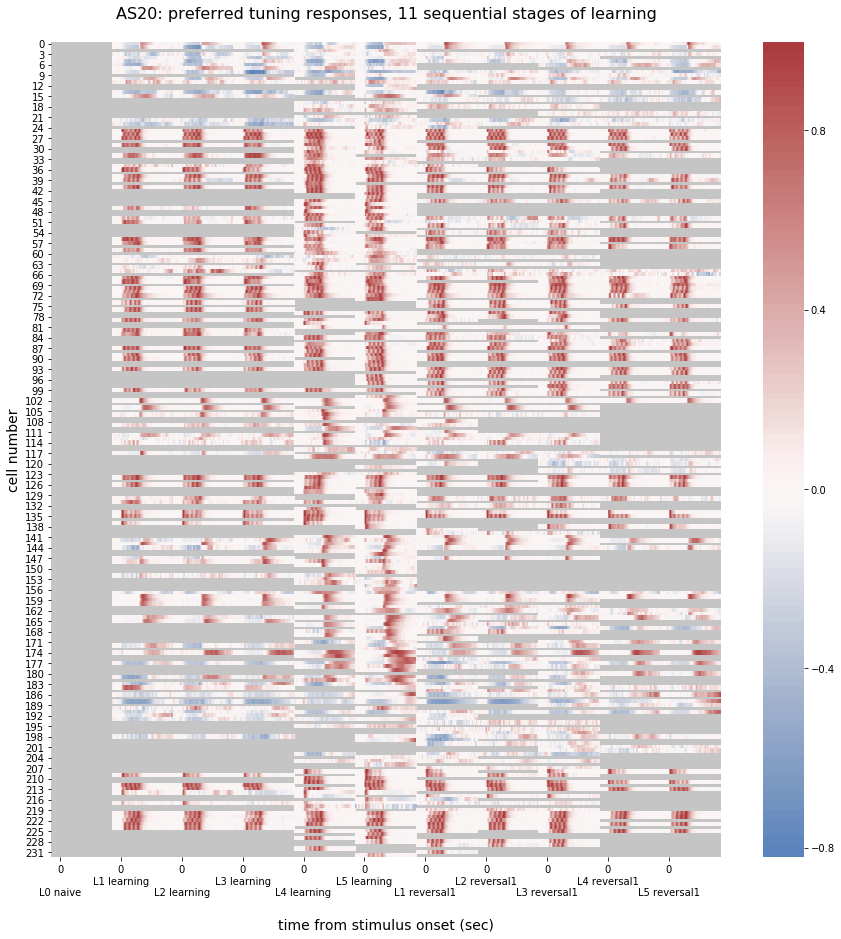

In [706]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = sns.color_palette("vlag", 100)

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list), center=0, ax=ax, cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax.set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax.set_xticks(stim_starts)
    ax.set_xticklabels(stim_labels, rotation=0)
    ax.set_ylabel('cell number', size=14)
    ax.set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_renorm_{mouse}.png', bbox_inches='tight')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_renorm_{mouse}.pdf', bbox_inches='tight')
    
    break


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


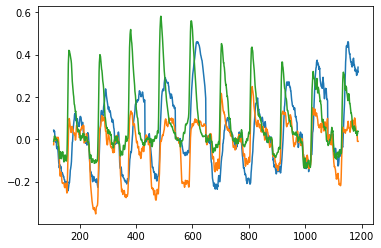

In [718]:
plt.plot(np.nanmean(np.hstack(stage_list)[170:190, :], axis=0))
plt.plot(np.nanmean(np.hstack(stage_list)[0:15, :], axis=0))
plt.plot(np.nanmean(np.hstack(stage_list)[141:170, :], axis=0))

## sorted by mean peak response time

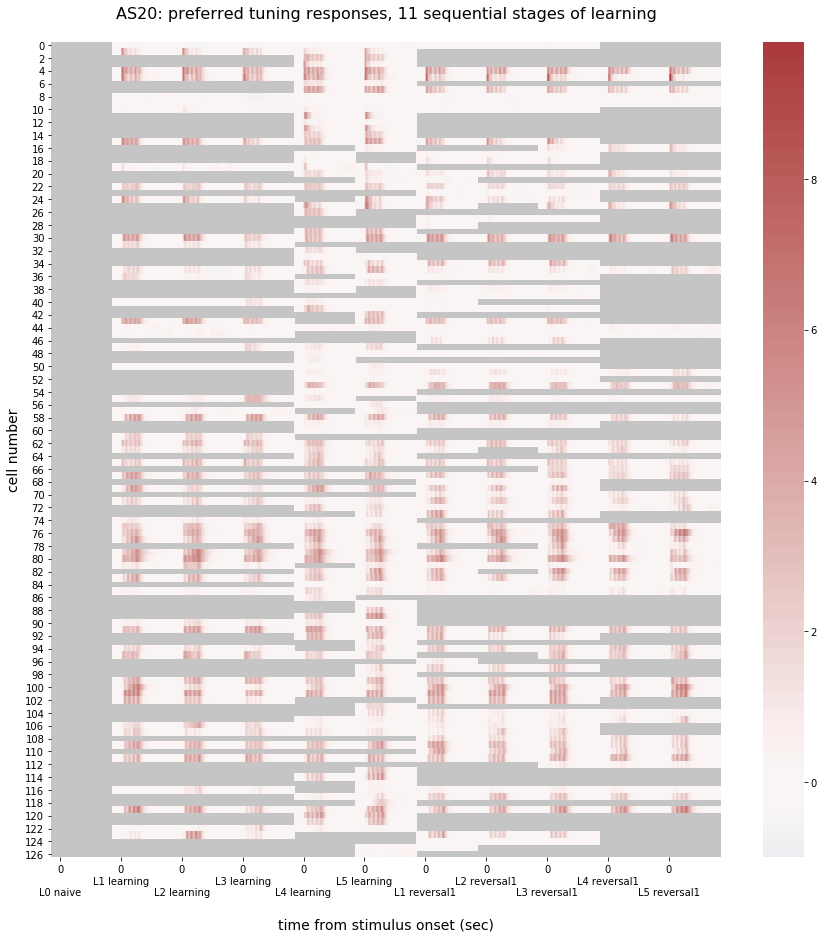

In [1013]:
# cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = sns.color_palette("vlag", 100)

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        
    peak_sort = np.argsort(np.argmax(np.nanmean(np.dstack(stage_list)[:,18:,:], axis=2), axis=1)) # sort post baseline
    
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list)[peak_sort, :], vmin=-1, center=0, ax=ax, cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax.set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax.set_xticks(stim_starts)
    ax.set_xticklabels(stim_labels, rotation=0)
    ax.set_ylabel('cell number', size=14)
    ax.set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_peaksort_{mouse}.png', bbox_inches='tight')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_heatmap_peaksort_{mouse}.pdf', bbox_inches='tight')
    
    break

In [1016]:
stack_traces.shape

(127, 1188)

Text(0.5, 114.0, '\ntime from stimulus onset (sec)')

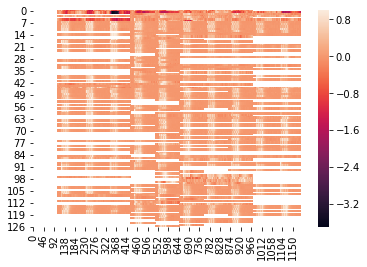

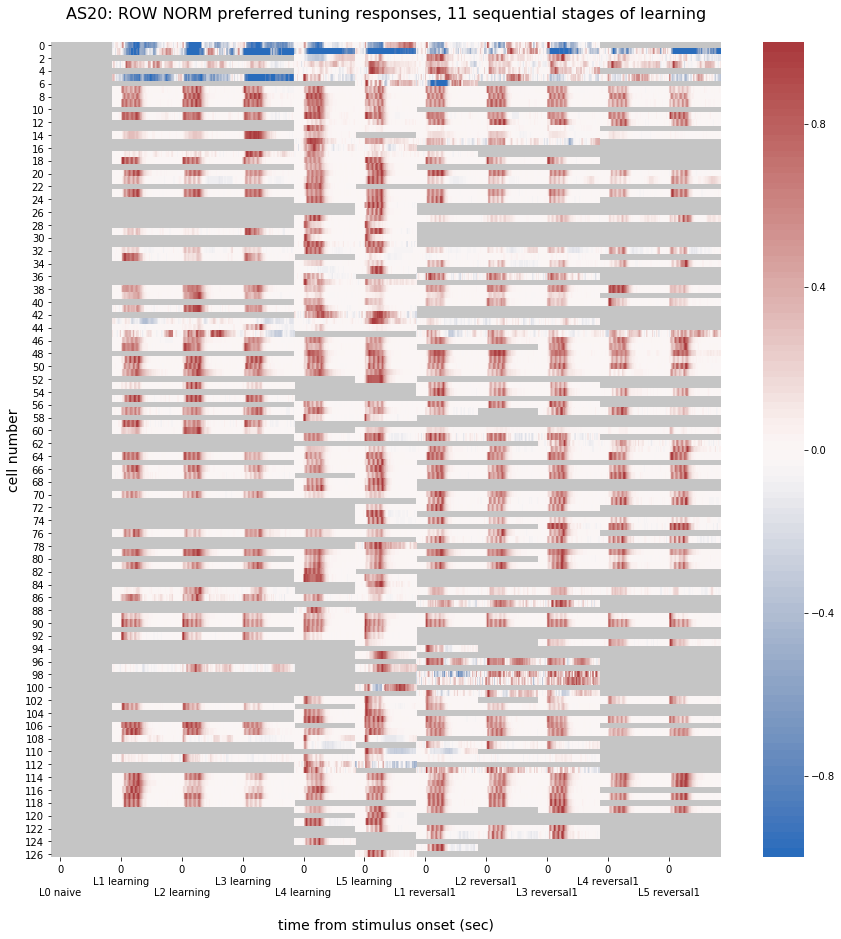

In [1018]:
# row norm 

stack_traces = np.hstack(stage_list)
max_over_time = np.nanmax(stack_traces, axis=1)
for cell_n, max_n in enumerate(max_over_time):
    stack_traces[cell_n, :] = stack_traces[cell_n, :]/max_n

sns.heatmap(stack_traces)

fig, ax = plt.subplots(1,1, figsize=(15,15))
g = sns.heatmap(stack_traces, vmin=-1, center=0, ax=ax, cmap=cmap)
g.set_facecolor('#c5c5c5')
ax.set_title(f'{mouse}: ROW NORM preferred tuning responses, 11 sequential stages of learning\n', size=16)
stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
ax.set_xticks(stim_starts)
ax.set_xticklabels(stim_labels, rotation=0)
ax.set_ylabel('cell number', size=14)
ax.set_xlabel('\ntime from stimulus onset (sec)', size=14)

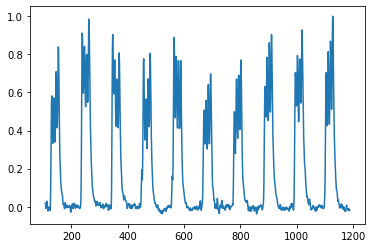

In [1025]:
plt.plot(stack_traces[50, :])

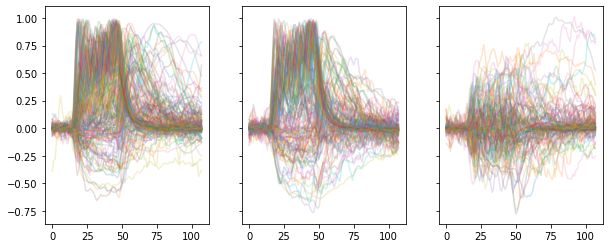

In [609]:
fig, ax = plt.subplots(1, 3, figsize=(10,4), sharex=True, sharey=True)

ax[0].plot(mouse_stage_respones[mouse]['L5 learning'][:,:,3].T, alpha=0.2);
ax[1].plot(mouse_stage_respones[mouse]['L1 reversal1'][:,:,3].T, alpha=0.2);
ax[2].plot(mouse_stage_respones[mouse]['L5 learning'][:,:,3].T -
           mouse_stage_respones[mouse]['L1 reversal1'][:,:,3].T, alpha=0.2);

In [607]:
test = np.hstack(stage_list)
test[np.hstack(stage_list) > 0] = np.nan
pop_inhib = np.nanmean(test, axis=0)
plt.figure(figsize=(12,3))
plt.plot(pop_inhib, label='inhib')

test = np.hstack(stage_list)
test[np.hstack(stage_list) < 0] = np.nan
pop_inhib = np.nanmean(test, axis=0)
# plt.figure(figsize=(12,3))
plt.plot(pop_inhib, label='excite')

ValueError: need at least one array to concatenate

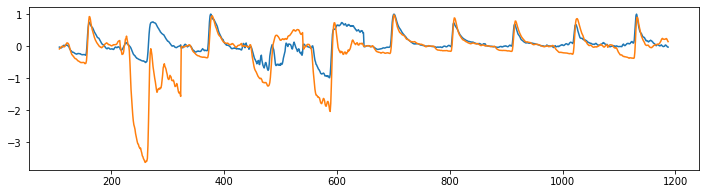

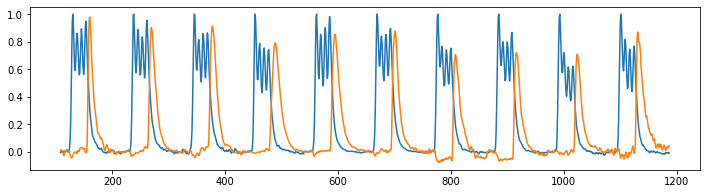

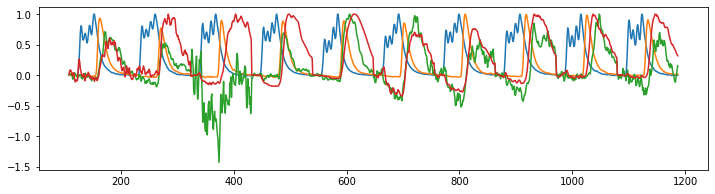

In [387]:
# plot some different cells for comparison
plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[0, :], label='cell 0')
plt.plot(np.hstack(stage_list)[1, :], label='cell 1')

plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[87, :], label='cell 87')
plt.plot(np.hstack(stage_list)[102, :], label='cell 102')

plt.figure(figsize=(12,3))
plt.plot(np.hstack(stage_list)[124, :], label='cell 124')
plt.plot(np.hstack(stage_list)[158, :], label='cell 158')
plt.plot(np.hstack(stage_list)[164, :], label='cell 164')
plt.plot(np.hstack(stage_list)[174, :], label='cell 174')

## mean per stage

In [772]:
remove_low_cell_weight_cells = True

mouse_stage_respones_pt = {}
mouse_offset_vec = {}
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):
    
    #preallocate
    mouse = meta.reset_index()['mouse'].unique()[0]
    for i in range(4):
        mouse_stage_respones_pt[mouse] = np.zeros((tensor.shape[0], 11, 4))  # hardcoded 11 for parsed_11stage staging
        mouse_stage_respones_pt[mouse][:] = np.nan
    
    # calculate mean by cue
    for c, cue in enumerate(['plus', 'minus', 'neutral']):
        mouse_stage_respones_pt[mouse][:, :, c] = utils.tensor_mean_per_stage_single_pt(
            meta, tensor, initial_cue=False, cue=cue, account_for_offset=False) # TUNING is in terms of condition right now, so don't use initial
    
    # add in a 4th z slice of preferred tuning responses
    tune_up = tune.reset_index()
    for c, s in enumerate(xorder):
        for cell_n in range(tensor.shape[0]):
            pref = tune_up.loc[tune_up.cell_n.isin([cell_n + 1]) & tune_up.parsed_11stage.isin([s]), 'preferred tuning']
            if len(pref) == 1:
                preferred_tuning = pref.item()
                if preferred_tuning == 'broad':
                    # average across cues for broadly tuned cells
                    mean_resp = np.nanmean(mouse_stage_respones_pt[mouse][cell_n, c, :])
                    mouse_stage_respones_pt[mouse][cell_n, c, 3] = mean_resp
                else:
                    # take single preferred tuning or average across joint tuned cells
                    tuning_levels = np.where([s in preferred_tuning for s in ['plus', 'minus', 'neutral']])[0]
                    tuned_response = np.nanmean(mouse_stage_respones_pt[mouse][cell_n, c, tuning_levels])
                    mouse_stage_respones_pt[mouse][cell_n, c, 3] = tuned_response
                    
    # who is an offset cell?
    offset_vec = utils.get_offset_cells(meta, tensor)
    mouse_offset_vec[mouse] = offset_vec
    
    # remove cells that did not participate in any component
    if remove_low_cell_weight_cells:
        cells_to_keep = ~np.isnan(utils.define_high_weight_cell_factors(model, 15, threshold=1))
        mouse_stage_respones_pt[mouse] = mouse_stage_respones_pt[mouse][cells_to_keep, :, :]
        mouse_offset_vec[mouse] = mouse_offset_vec[mouse][cells_to_keep]
    break

s:\twophoton_analysis\code\cascade\cascade\utils.py:173: RuntimeWarning: Mean of empty slice
  stage_matrix = np.nanmean(mtensor[:, stim_bool, :], axis=1)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


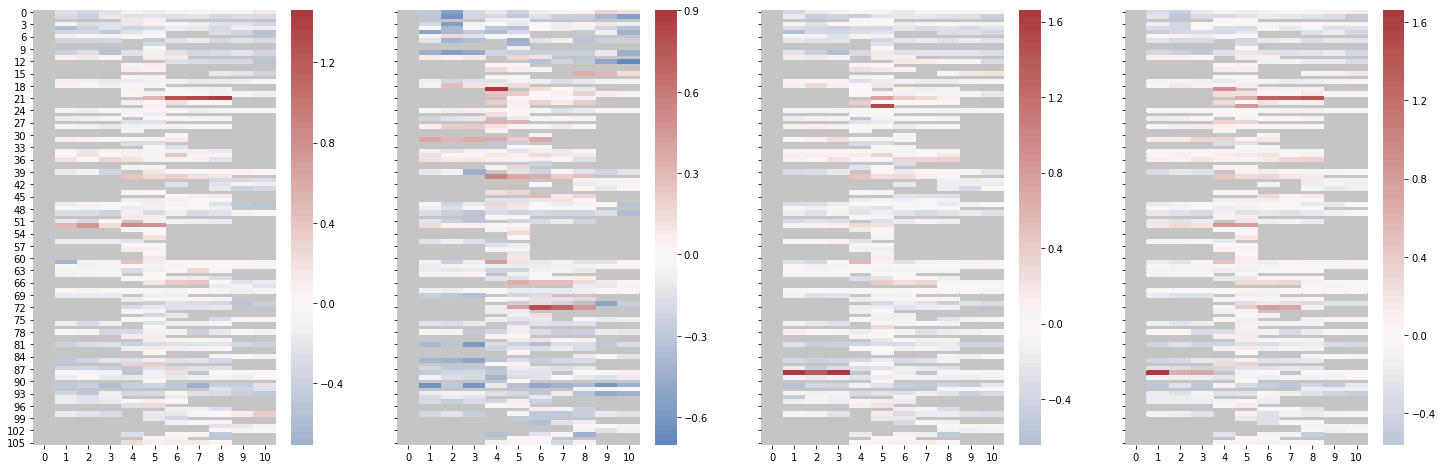

In [777]:
fig, ax = plt.subplots(1,4, figsize=(25, 8), sharey=True)
for i in range(4):
    g = sns.heatmap(mouse_stage_respones_pt['AS20'][mouse_offset_vec['AS20'],:,i], cmap=cmap, center=0, ax=ax[i])
    g.set_facecolor('#c5c5c5')
#     sns.heatmap(mouse_stage_respones_pt['AS20'][:,:,i], cmap=cmap, vmax=0.5, center=0, ax=ax[i])

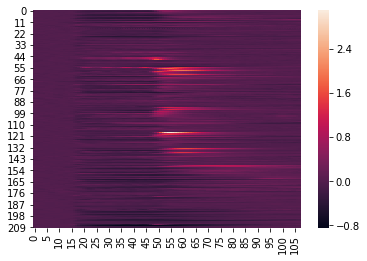

In [768]:
# test_offset = utils.offset_cells(meta_list[0], tensor_list[0])
# plt.plot(np.nanmean(tensor_list[0], axis=2)[test_offset, :][11, :])
sns.heatmap(np.nanmean(tensor_list[0], axis=2)[test_offset, :])

In [761]:
debug

> s:\twophoton_analysis\code\cascade\cascade\utils.py(194)offset_cells()
    192     stim_offset_buffer_start = int(np.floor(15.5 * (1 + lookups.stim_length[mouse] - 0.300)))
    193     stim_offset_buffer_end = int(np.floor(15.5 * (1 + lookups.stim_length[mouse] + 0.300)))
--> 194     trace_mean[:, stim_offset_buffer_start:stim_offset_buffer_end] = np.nan
    195     offset_bool = np.nanargmax(trace_mean, axis=1) > 15.5 * (1 + lookups.stim_length[mouse])
    196 



ipdb>  q


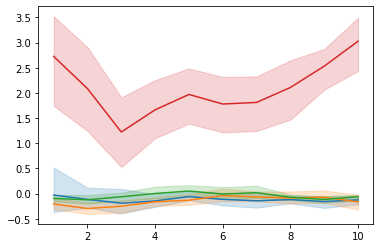

In [748]:
df = pd.DataFrame(mouse_stage_respones_pt['AS20'][170:190,:,3])
df['cell_n'] = np.arange(170, 190, 1)
df = df.set_index('cell_n')
df = df.unstack().reset_index().rename(columns={'level_0': 'stage', 0: 'zscore'}).set_index('cell_n')
sns.lineplot(data=df.unstack(), x='stage', y='zscore')

df = pd.DataFrame(mouse_stage_respones_pt['AS20'][0:15,:,3])
df['cell_n'] = np.arange(0, 15, 1)
df = df.set_index('cell_n')
df = df.unstack().reset_index().rename(columns={'level_0': 'stage', 0: 'zscore'}).set_index('cell_n')
sns.lineplot(data=df.unstack(), x='stage', y='zscore')

df = pd.DataFrame(mouse_stage_respones_pt['AS20'][141:170,:,3])
df['cell_n'] = np.arange(141, 170, 1)
df = df.set_index('cell_n')
df = df.unstack().reset_index().rename(columns={'level_0': 'stage', 0: 'zscore'}).set_index('cell_n')
sns.lineplot(data=df.unstack(), x='stage', y='zscore')

df = pd.DataFrame(mouse_stage_respones_pt['AS20'][210:230,:,3])
df['cell_n'] = np.arange(210, 230, 1)
df = df.set_index('cell_n')
df = df.unstack().reset_index().rename(columns={'level_0': 'stage', 0: 'zscore'}).set_index('cell_n')
sns.lineplot(data=df.unstack(), x='stage', y='zscore')


In [ ]:
plt.plot(np.nanmean(np.hstack(stage_list)[170:190, :], axis=0))
plt.plot(np.nanmean(np.hstack(stage_list)[0:15, :], axis=0))
plt.plot(np.nanmean(np.hstack(stage_list)[141:170, :], axis=0))

plt.figure()
# plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][170:190,:,3], axis=0).T)
# plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][0:15,:,3], axis=0).T)
# plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][141:170,:,3], axis=0).T)
sns.lineplot(data=pd.DataFrame(mouse_stage_respones_pt['AS20'][141:170,:,3]))
# plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][0:20,:,3], axis=0), color='black', linewidth=2);


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


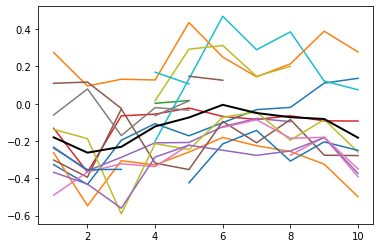

In [696]:
plt.plot(mouse_stage_respones_pt['AS20'][0:20,:,3].T)
plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][0:20,:,3], axis=0), color='black', linewidth=2);

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


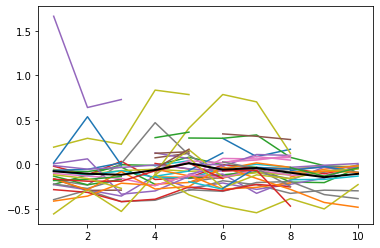

In [697]:
plt.plot(mouse_stage_respones_pt['AS20'][140:205,:,3].T)
plt.plot(np.nanmean(mouse_stage_respones_pt['AS20'][140:205,:,3], axis=0), color='black', linewidth=2);

# phase stability
- define F1/F0 ratio for cells with stimulus responses
- for cells with a high degree of F1/F0 (2 Hz temporal frequency tracking from the stimulus), are they phase locked across time?
    - show individual trials for one stage and mean (panel one), pick 3 example cells?
    - show all stages and mean for same cell (panel 2) 
    - show summary of phase stability --> y = A sin(B(x + C)) + D; C is phase shift if you fit with a sin,
    - np.correlate() for cross correlation 

In [987]:
from scipy import optimize

def test_func(x, a, b, c, d, e):
    return a * np.sin(b * (x + c)) + d*x + e

def test_func2(x, a, b, c, d, e, f, g):
    return a * np.sin(b * (x + c)) + d*x + e + f*(1-g)**x

def decay_func(x, f, g, h):
    return f*(1-g)**x + h

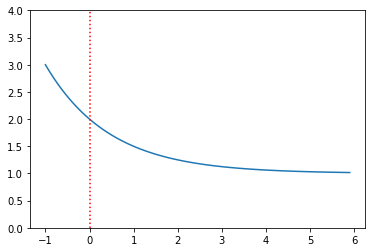

In [988]:
x_data = (np.arange(0, 108, 1) - 15.5)/15.5
plt.plot(x_data, decay_func(x_data, 1, .5, 1))
plt.ylim([0, 4])
plt.axvline(0, linestyle=':', color='red')

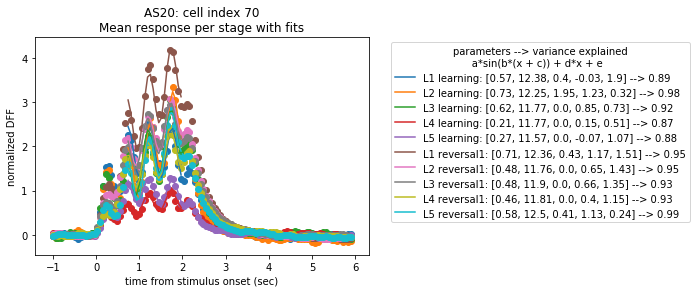

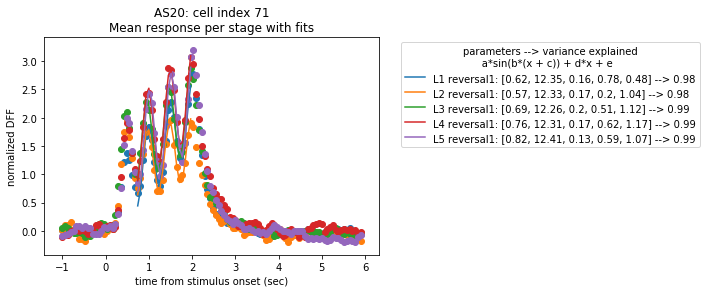

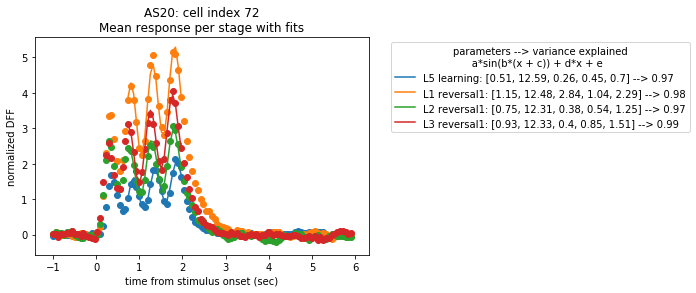

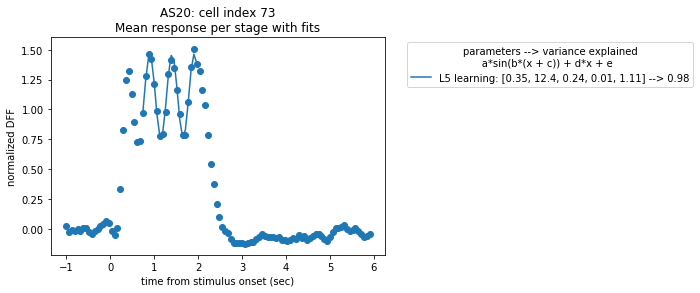

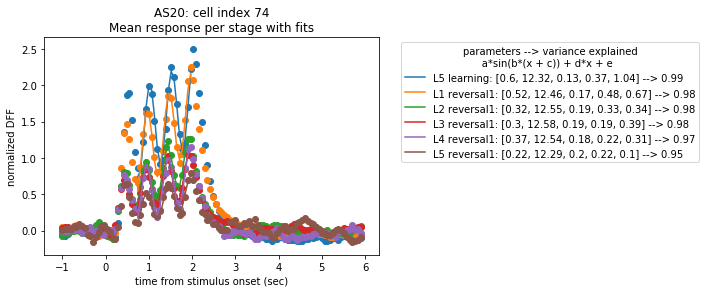

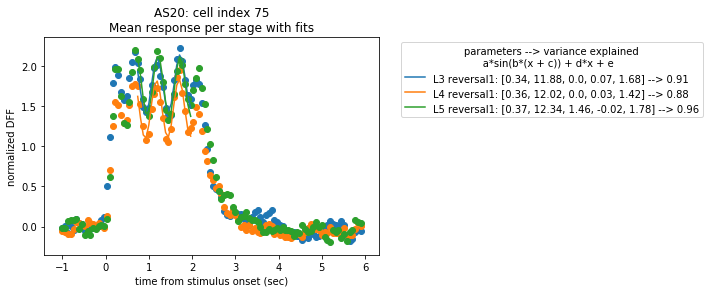

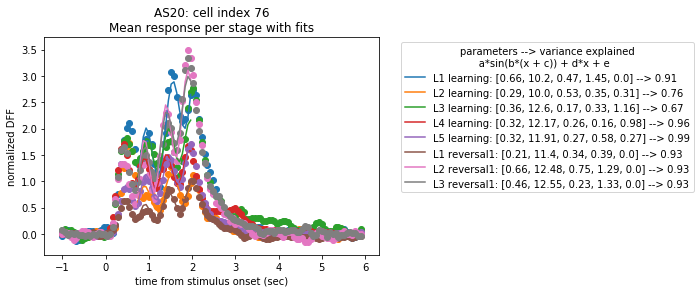

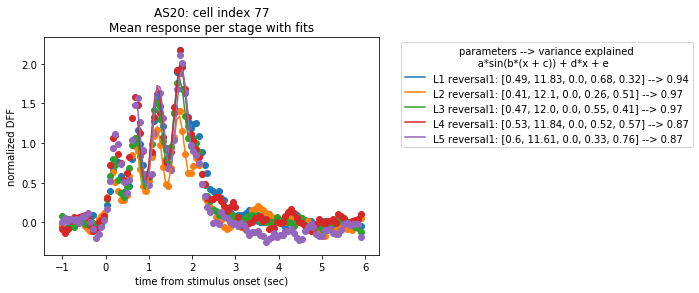

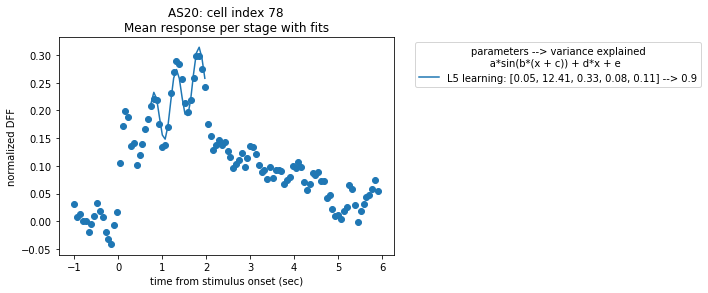

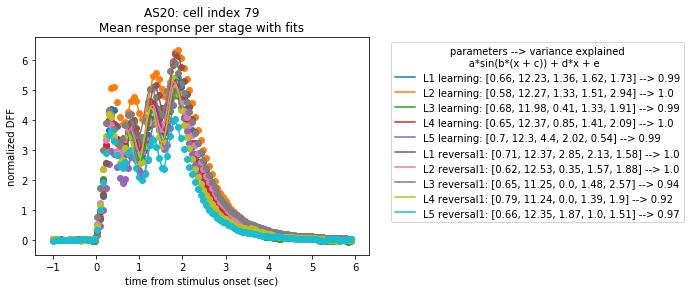

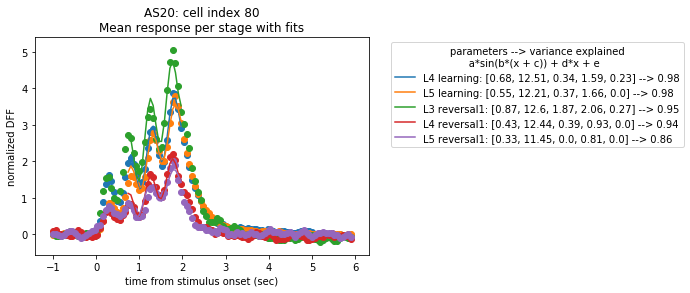

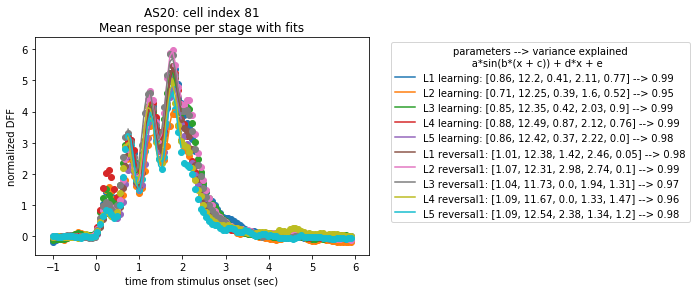

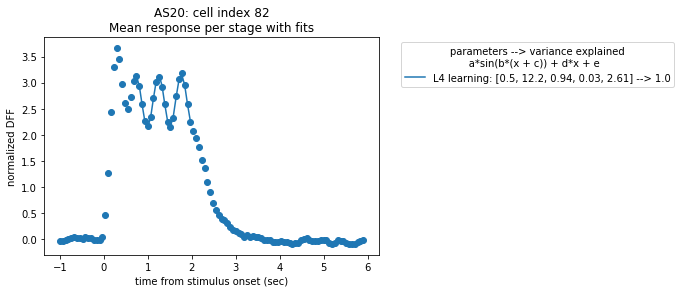

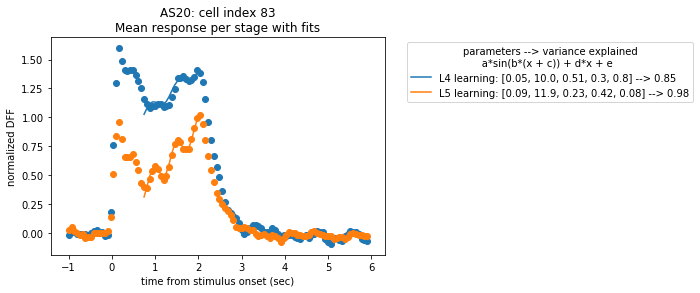

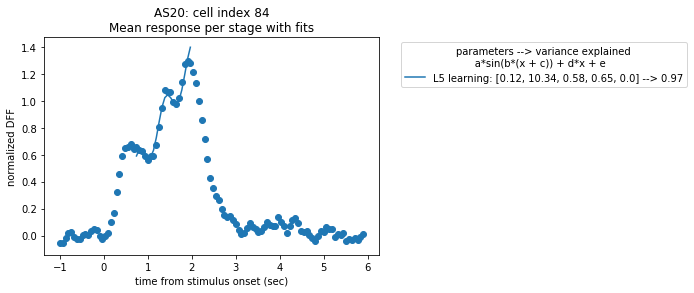

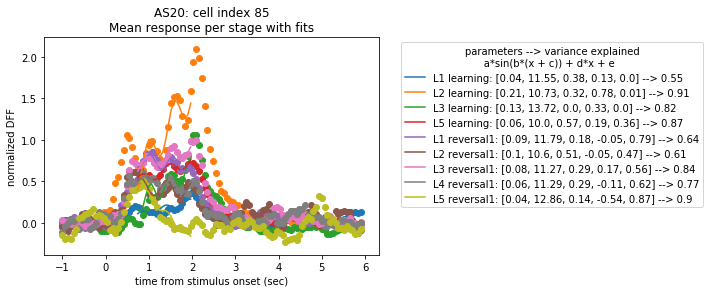

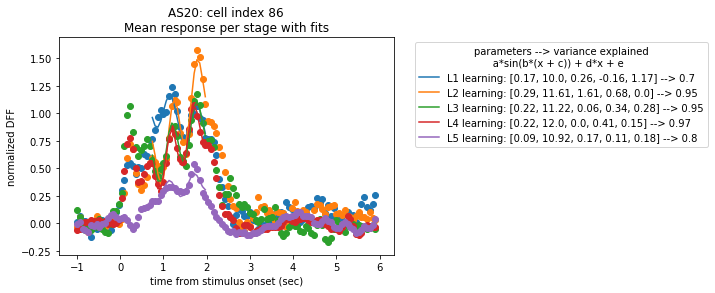

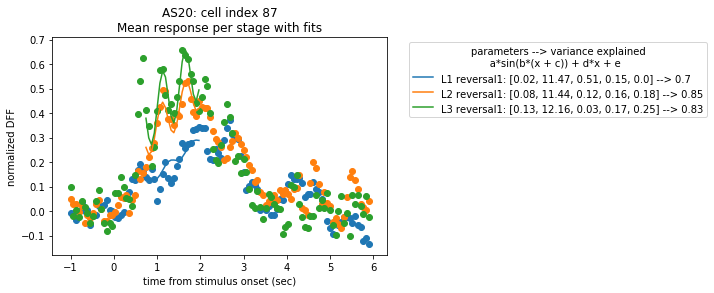

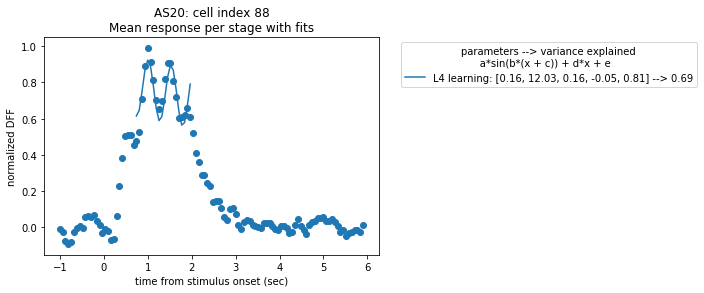

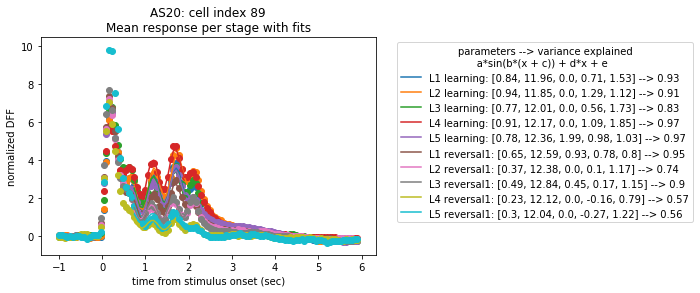

In [1189]:
## testing curve fitting a sinusoid with an offset (C = phase offset)
# plt.figure(figsize=(6, 4))
for i in range(70, 90):
    plt.figure(figsize=(6, 4))
    for s in xorder:
        pref_chunk = mouse_stage_respones[mouse][s][i,27:47,3]
        if np.isnan(pref_chunk).any():
                continue
        x_data = (np.arange(27, 47, 1) - 15.5)/15.5
#         params, params_covariance = optimize.curve_fit(test_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
#                                                    bounds=((0.01, 11, 0,  -1, 0), (0.3, 14, 1, 1, 1)))
        params, params_covariance = optimize.curve_fit(test_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
                                                               bounds=((0.01, 10, 0,  -10, 0), (10, 15, 5, 10, 10)))
#         params, params_covariance = optimize.curve_fit(test_func2, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1, 1, .5],
#                                                    bounds=((0.01, 11, 0,  -1, 0, 0, 0), (0.3, 14, 1, 1, 1, 10, 1)))
#         params, params_covariance = optimize.curve_fit(test_func2, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1, 1, .5],
#                                                                bounds=((0.01, 10, 0,  -10, 0, 0, 0), (10, 15, 5, 10, 10, 10, 1)))
    # print(params)

        varex = 1 - np.nanvar(pref_chunk - test_func(x_data, params[0], params[1], params[2], params[3], params[4]))/np.nanvar(pref_chunk)
#         varex = 1 - np.nanvar(pref_chunk - test_func2(x_data, params[0], params[1],
#                                                      params[2], params[3], params[4], params[5], params[6]))/np.nanvar(pref_chunk)
    #     plt.scatter(x_data, pref_chunk)
    #     x_data2 = np.arange(15, 46, 1)/15.5
#         plt.figure(figsize=(6, 4))
        plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4]),
#         plt.plot(x_data, test_func2(x_data, params[0], params[1], params[2], params[3], params[4], params[5], params[6]),
             label=f'{s}: {[round(s,2) for s in params]} --> {round(varex, 2)}')
        full_x = (np.arange(0, 108, 1) - 15.5)/15.5
        plt.scatter(full_x, mouse_stage_respones[mouse][s][i,:,3])

    plt.legend(title='parameters --> variance explained\n' +
    '      a*sin(b*(x + c)) + d*x + e', loc='best', bbox_to_anchor=(1.05, 1))
    plt.title(f'{mouse}: cell index {i}\nMean response per stage with fits')
    plt.xlabel('time from stimulus onset (sec)')
    plt.ylabel('normalized DFF')
    
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_cellsinfits_{mouse}_celln{i}.png', bbox_inches='tight')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_cellsinfits_{mouse}_celln{i}.pdf', bbox_inches='tight')
# plt.xlim([0, 2])

# plt.show()

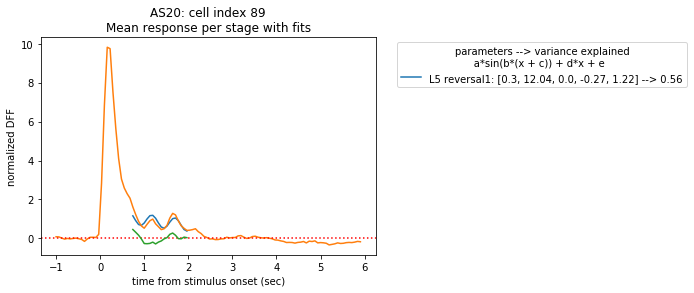

In [1009]:

plt.plot(x_data, test_func(x_data, params[0], params[1], params[2], params[3], params[4]),
     label=f'{s}: {[round(s,2) for s in params]} --> {round(varex, 2)}')
full_x = (np.arange(0, 108, 1) - 15.5)/15.5
plt.plot(full_x, mouse_stage_respones[mouse][s][i,:,3])

plt.legend(title='parameters --> variance explained\n' +
'      a*sin(b*(x + c)) + d*x + e', loc='best', bbox_to_anchor=(1.05, 1))
plt.title(f'{mouse}: cell index {i}\nMean response per stage with fits')
plt.xlabel('time from stimulus onset (sec)')
plt.ylabel('normalized DFF')
plt.axhline(0, linestyle=':', color='red')

plt.plot(x_data, pref_chunk - test_func(x_data, params[0], params[1], params[2], params[3], params[4]))

In [1010]:
# calculate variance explained
y_fit = test_func(x_data, params[0], params[1], params[2], params[3], params[4])
varex = 1 - np.nanvar(pref_chunk - y_fit)/np.nanvar(pref_chunk)

# get r-squared
ss_res = np.sum((pref_chunk - y_fit) ** 2) # residual sum of squares
ss_tot = np.sum((pref_chunk - np.mean(pref_chunk)) ** 2) # total sum of squares
r2 = 1 - (ss_res / ss_tot) # r-squared

print(varex, r2)

0.5627493796404793 0.5627493796404794


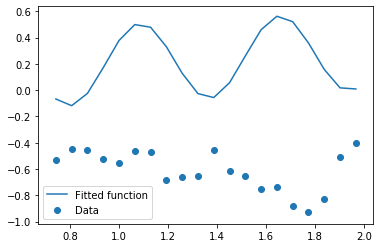

In [1125]:

plt.scatter(x_data, pref_chunk, label='Data')
plt.plot(x_data, test_func(x_data, 0.3, 11, 0.2, 0.1, 0.1),
         label='Fitted function')

plt.legend(loc='best') # bounds=((0.01, 0.3), (11, 14), (0, 1), (-1, 1), (0, 1))

## create a method for statistically determining if a cell's behavior across time is reliable
- within this you should get stim suppression, stim excitation, offset excitation

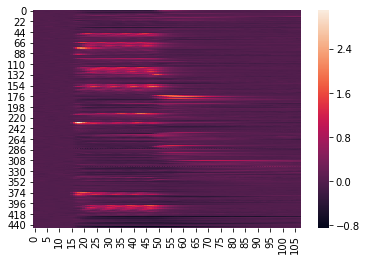

In [1445]:
trace_mean = np.nanmean(tensor, axis=2)
sns.heatmap(trace_mean)

In [1450]:
test = utils.tensor_mean_per_stage(meta, tensor, initial_cue=True, cue=['plus', 'minus', 'neutral'], nan_licking=False, staging='parsed_11stage')
test2 = utils.tensor_mean_per_day(meta, tensor, initial_cue=True, cue=['plus', 'minus', 'neutral'], nan_licking=False)

s:\twophoton_analysis\code\cascade\cascade\utils.py:48: RuntimeWarning: Mean of empty slice
  def tensor_mean_per_trial(meta, tensor, nan_licking=False, account_for_offset=False):


In [1463]:
from scipy import stats

# get average baseline
times = np.arange(-1, 6, 1 / 15.5)[:108]
stim_bool = (times > 0) & (times < cas.lookups.stim_length[mouse])
response_bool = (times > cas.lookups.stim_length[mouse] + 0.3) & (times < cas.lookups.stim_length[mouse] + 2)  # 300ms delay

# get mean for different periods of time 
baselines = np.nanmean(test[:, :16, :], axis=1)
stim = np.nanmean(test[:, stim_bool, :], axis=1)
response = np.nanmean(test[:, response_bool, :], axis=1)

# loop over cells and calculate ranksum
pv_stim = np.zeros(len(baselines))
pv_response = np.zeros(len(baselines))
for cell_i in range(len(baselines)):
    pv_stim[cell_i] = stats.ranksums(baselines[cell_i, :], stim[cell_i, :]).pvalue
    pv_response[cell_i] = stats.ranksums(baselines[cell_i, :], response[cell_i, :]).pvalue


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()


## test - measuring stability in terms of diff between days

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Run

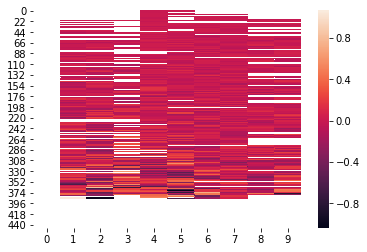

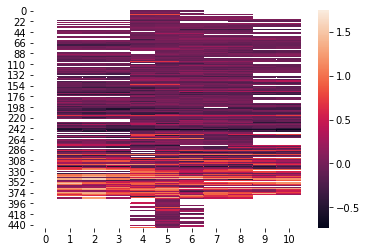

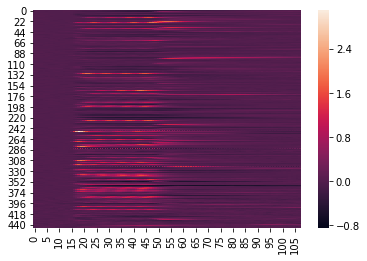

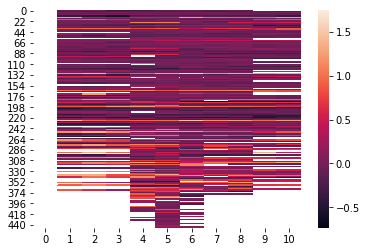

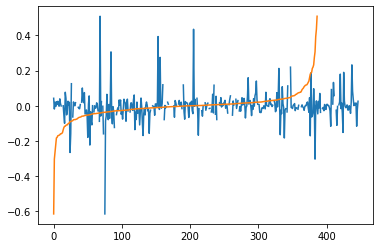

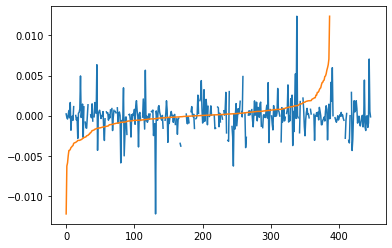

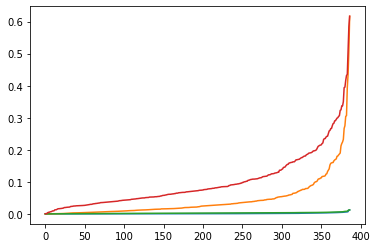

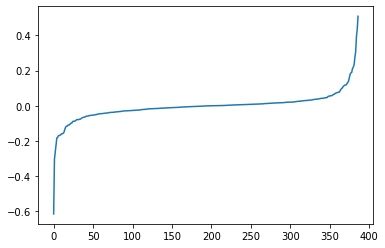

In [1599]:
plt.figure()
sort_order = np.argsort(np.nanmean(np.abs(np.diff(stim[:, :], axis=1)), axis=1))
sns.heatmap(np.diff(stim[sort_order, :], axis=1))

plt.figure()
sort_order = np.argsort(np.nanmean(np.abs(np.diff(stim[:, :], axis=1)), axis=1))
sns.heatmap(stim[sort_order, :])

plt.figure()
# sort_order = np.argsort(np.nanmean(np.abs(np.diff(stim[:, :], axis=1)), axis=1))
sort_order = np.argsort(np.abs(np.nanmean(np.diff(stim[:, :], axis=1), axis=1)))
sns.heatmap(trace_mean[sort_order, :])

plt.figure()
sort_order = np.argsort(np.abs(np.nanmean(np.diff(stim[:, :], axis=1), axis=1)))
sns.heatmap(stim[sort_order, :])

plt.figure()
plt.plot(np.nanmean(np.diff(stim[:, :], axis=1), axis=1));
plt.plot(np.sort(np.nanmean(np.diff(stim[:, :], axis=1), axis=1)))

plt.figure()
plt.plot(np.nanmean(np.diff(baselines[:, :], axis=1), axis=1));
plt.plot(np.sort(np.nanmean(np.diff(baselines[:, :], axis=1), axis=1)))

plt.figure()
plt.plot(np.sort(np.abs(np.nanmean(np.diff(baselines[:, :], axis=1), axis=1))))
plt.plot(np.sort(np.abs(np.nanmean(np.diff(stim[:, :], axis=1), axis=1))))

plt.plot(np.sort(np.nanmean(np.abs(np.diff(baselines[:, :], axis=1)), axis=1)))
plt.plot(np.sort(np.nanmean(np.abs(np.diff(stim[:, :], axis=1)), axis=1)))

plt.figure()
plt.plot(np.sort(np.nanmean(np.diff(stim[:, :], axis=1), axis=1)))

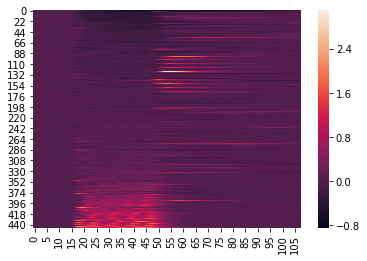

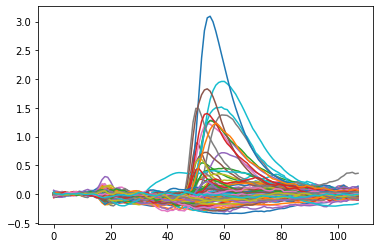

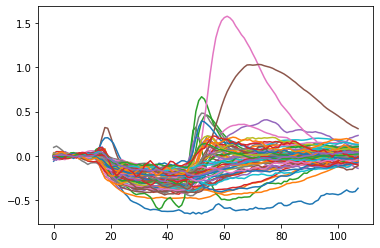

In [1484]:
sorted_traces = trace_mean[np.argsort(np.nanmean(stim, axis=1)), :]
sns.heatmap(sorted_traces)

plt.figure()
plt.plot(sorted_traces[66:176, :].T);
plt.figure()
plt.plot(sorted_traces[1:66, :].T);

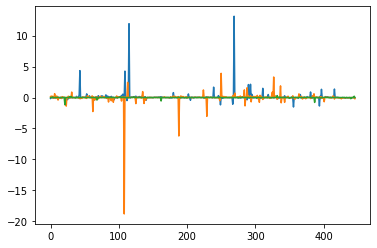

In [1461]:
# fano factor
plt.plot(np.nanvar(stim, axis=1)/np.nanmean(stim, axis=1))
plt.plot(np.nanvar(response, axis=1)/np.nanmean(response, axis=1))
plt.plot(np.nanvar(baselines, axis=1)/np.nanmean(baselines, axis=1))

In [1616]:
(np.ones((stim.shape[0], stim.shape[1]))*np.arange(stim.shape[1])).shape

(447, 11)

In [1663]:
pre_speed = meta.groupby('parsed_11stage').mean()['pre_speed']
'L0 naive' in pre_speed.index

True

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


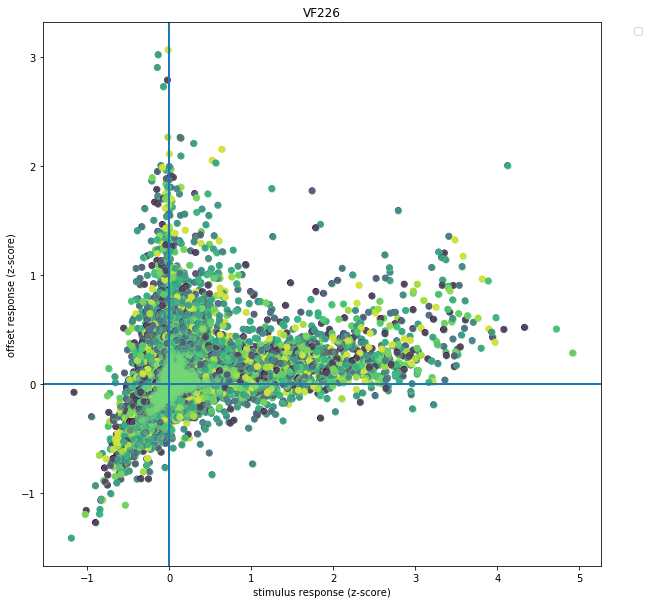

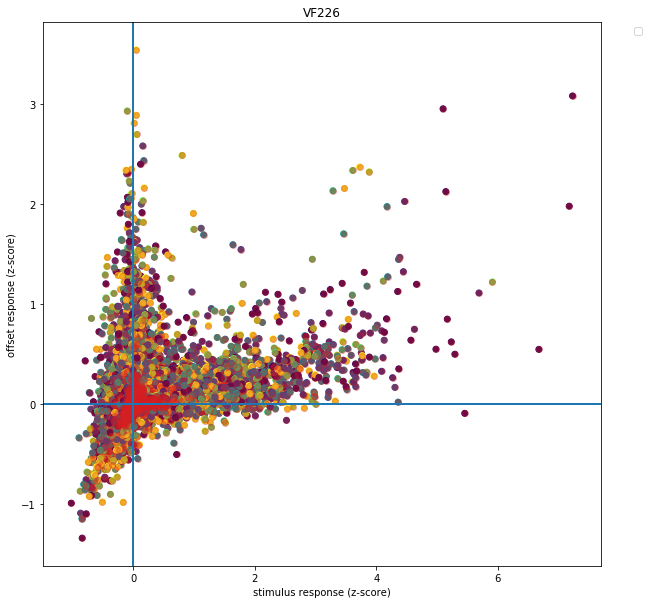

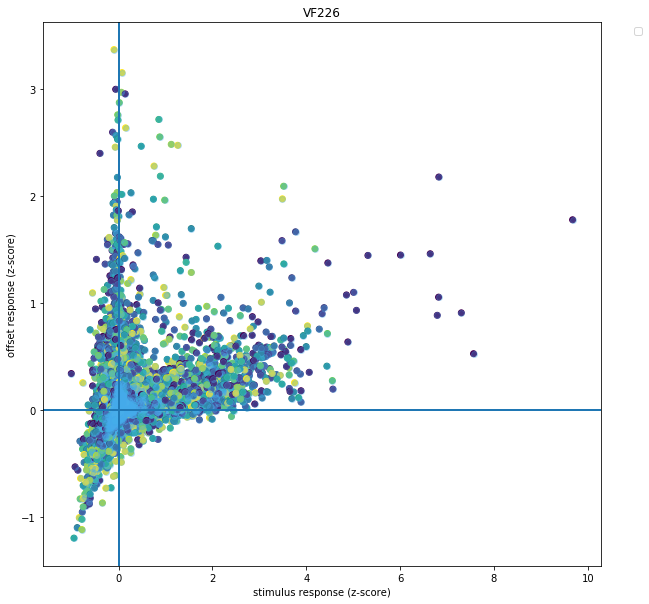

In [1653]:
for cue in ['plus', 'minus', 'neutral']:
    plt.figure(figsize=(10, 10))

    for meta, tensor in zip(meta_list, tensor_list):

        mouse = meta.reset_index()['mouse'].unique()[0]

        # get stage average
        test = utils.tensor_mean_per_stage(meta, tensor, initial_cue=True, cue=cue,
                                           nan_licking=False, staging='parsed_11stage')

#         test = np.nanmean(tensor, axis=2)

        # get average baseline
        times = np.arange(-1, 6, 1 / 15.5)[:108]
        stim_bool = (times > 0) & (times < cas.lookups.stim_length[mouse])
        response_bool = (times > cas.lookups.stim_length[mouse] + 0.3) & (times < cas.lookups.stim_length[mouse] + 2)  # 300ms delay

        # get mean for different periods of time 
        baselines = np.nanmean(test[:, :16, :], axis=1)
        stim = np.nanmean(test[:, stim_bool, :], axis=1)
        response = np.nanmean(test[:, response_bool, :], axis=1)
#         baselines = np.nanmean(test[:, :16], axis=1)
#         stim = np.nanmean(test[:, stim_bool], axis=1)
#         response = np.nanmean(test[:, response_bool], axis=1)

        pre_speed = meta.groupby('parsed_11stage').mean()['pre_speed']
        avg_speed = np.zeros(response.shape)
        for cs, s in cas.looksups.staging('parsed_11stage'):
            avg_speed[:, cs] = pre_speed.loc[s]

    #     plt.figure(figsize=(10, 10))
        plt.scatter(stim[:, :].flatten(), response[:, :].flatten(),
                    c=(np.ones((stim.shape[0], stim.shape[1]))*np.arange(stim.shape[1])).flatten())
        plt.scatter(stim, response, color=cas.lookups.color_dict[cue], alpha=0.3) #label=f'{mouse}'
        plt.axhline(0)
        plt.axvline(0)
        plt.title(f'{mouse}')
        plt.xlabel('stimulus response (z-score)')
        plt.ylabel('offset response (z-score)')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# stage_proxy = np.ones((stim.shape[0], stim.shape[1]))*np.arange(stim.shape[1])
# sns.scatterplot(x=stim[:, 0:2].flatten(), y=response[:, 0:2].flatten(), hue=stage_proxy[:, 0:2].flatten())

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
No handles with labels found to put in legend.


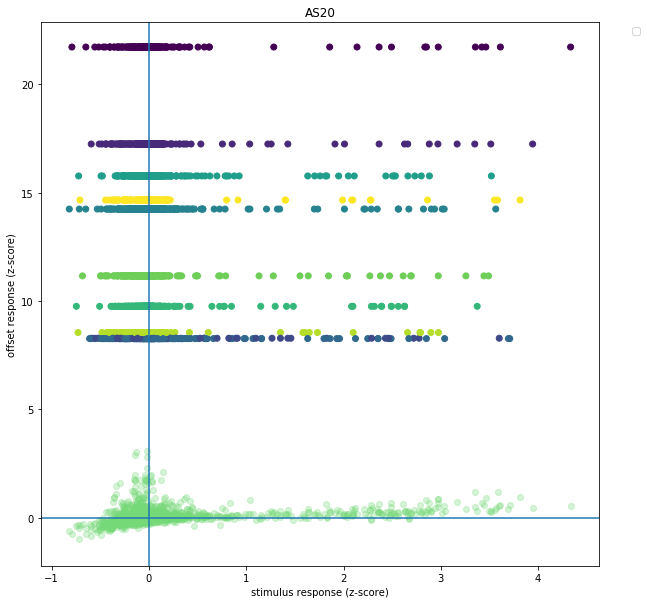

In [1669]:
for cue in ['plus', 'minus', 'neutral']:
    plt.figure(figsize=(10, 10))

    for meta, tensor in zip(meta_list, tensor_list):

        mouse = meta.reset_index()['mouse'].unique()[0]

        # get stage average
        test = utils.tensor_mean_per_stage(meta, tensor, initial_cue=True, cue=cue,
                                           nan_licking=False, staging='parsed_11stage')

#         test = np.nanmean(tensor, axis=2)

        # get average baseline
        times = np.arange(-1, 6, 1 / 15.5)[:108]
        stim_bool = (times > 0) & (times < cas.lookups.stim_length[mouse])
        response_bool = (times > cas.lookups.stim_length[mouse] + 0.3) & (times < cas.lookups.stim_length[mouse] + 2)  # 300ms delay

        # get mean for different periods of time 
        baselines = np.nanmean(test[:, :16, :], axis=1)
        stim = np.nanmean(test[:, stim_bool, :], axis=1)
        response = np.nanmean(test[:, response_bool, :], axis=1)
#         baselines = np.nanmean(test[:, :16], axis=1)
#         stim = np.nanmean(test[:, stim_bool], axis=1)
#         response = np.nanmean(test[:, response_bool], axis=1)

        pre_speed = meta.groupby('parsed_11stage').mean()['pre_speed']
        avg_speed = np.zeros(response.shape)
        avg_speed[:] = np.nan
        for cs, s in enumerate(cas.lookups.staging['parsed_11stage']):
            if s in pre_speed.index:
                avg_speed[:, cs] = pre_speed.loc[s]

    #     plt.figure(figsize=(10, 10))
        plt.scatter(stim[:, :].flatten(), avg_speed[:, :].flatten(),
                    c=(np.ones((stim.shape[0], stim.shape[1]))*np.arange(stim.shape[1])).flatten())
        plt.scatter(stim, response, color=cas.lookups.color_dict[cue], alpha=0.3) #label=f'{mouse}'
        plt.axhline(0)
        plt.axvline(0)
        plt.title(f'{mouse}')
        plt.xlabel('stimulus response (z-score)')
        plt.ylabel('offset response (z-score)')
        break
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    break
# stage_proxy = np.ones((stim.shape[0], stim.shape[1]))*np.arange(stim.shape[1])
# sns.scatterplot(x=stim[:, 0:2].flatten(), y=response[:, 0:2].flatten(), hue=stage_proxy[:, 0:2].flatten())

In [1646]:
test.shape

(447, 108)

# full size sin fitting

In [1504]:
# loop over tensor, averaging different periods of time for all cells
norm_please = True
remove_low_cell_weight_cells = True

def sin_func(x, a, b, c, d, e):
    return a * np.sin(b * (x + c)) + d*x + e

# manually order learning stages
xorder = ['L0 naive',
          'L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning',
          'L1 reversal1', 'L2 reversal1', 'L3 reversal1', 'L4 reversal1', 'L5 reversal1']

mouse_sin_stage_respones = {}
mouse_sin_fits = {}
mouse_peak_fits = {}
mouse_sin_cells = {}
mouse_phase_lags = {}
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):
    
    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    mouse_sin_stage_respones[mouse] = {}
    mouse_sin_fits[mouse] = {}
    mouse_phase_lags[mouse] = {}
    mouse_phase_lags[mouse] = {}
    mouse_peak_fits[mouse] = {}
    
    # preallocate
    for s in xorder:
        blank = np.zeros((tensor.shape[0], tensor.shape[1], 4))
        blank[:] = np.nan
        mouse_sin_stage_respones[mouse][s] = blank
    
    # get mean of pmn trials for each stage
    for s in xorder:
        for c, icue in enumerate(['plus', 'minus', 'neutral']):
            meta_bool = meta.parsed_11stage.isin([s]) & meta.condition.isin([icue])  # WHY IS THIS ICOND
            cue_stage_tensor = tensor[:, :, meta_bool]
            cue_stage_mean = np.nanmean(cue_stage_tensor, axis=2)
            mouse_sin_stage_respones[mouse][s][:, :, c] = cue_stage_mean
    
    # normalize to max response for best cue
    if norm_please:
        # norm by max ---> WARNING THIS WILL NOT HANDLE SUPPRESSED CELLS (ONLY USE FOR STIMULUS DRIVEN CELLS)
        for s in xorder:
            cue_stage_mean = mouse_sin_stage_respones[mouse][s]
            max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
            mouse_sin_stage_respones[mouse][s] = cue_stage_mean/max_vec
        
        # norm by sub min, div max, rebaseline, (so total amplitude across min and max must be 1)
#         for s in xorder:
#             cue_stage_mean = mouse_sin_stage_respones[mouse][s]
#             min_vec = np.nanmin(np.nanmin(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
#             cue_stage_mean = cue_stage_mean - min_vec
#             max_vec = np.nanmax(np.nanmax(cue_stage_mean, axis=1, keepdims=True), axis=2, keepdims=True)
#             cue_stage_mean = cue_stage_mean/max_vec
#             base_mean_vec = np.nanmean(np.nanmean(cue_stage_mean[:,:15,:], axis=1, keepdims=True), axis=2, keepdims=True)
#             mouse_sin_stage_respones[mouse][s] = cue_stage_mean - base_mean_vec
            
    # add in a 4th z slice of preferred tuning responses
    tune_up = tune.reset_index()
    for s in xorder:
        for cell_n in range(tensor.shape[0]):
            pref = tune_up.loc[tune_up.cell_n.isin([cell_n + 1]) & tune_up.parsed_11stage.isin([s]), 'preferred tuning']
            if len(pref) == 1:
                preferred_tuning = pref.item()
                if preferred_tuning == 'broad':
                    # average across cues for broadly tuned cells
                    mean_resp = np.nanmean(mouse_sin_stage_respones[mouse][s][cell_n, :, :], axis=1)
                    mouse_sin_stage_respones[mouse][s][cell_n, :, 3] = mean_resp
                else:
                    # take single preferred tuning or average across joint tuned cells
                    tuning_levels = np.where([s in preferred_tuning for s in ['plus', 'minus', 'neutral']])[0]
                    tuned_response = np.nanmean(mouse_sin_stage_respones[mouse][s][cell_n, :, tuning_levels], axis=0)
                    mouse_sin_stage_respones[mouse][s][cell_n, :, 3] = tuned_response
    
    # who is an offset cell?
    offset_vec = utils.get_offset_cells(meta, tensor)
    
    # vector of cell indices for keeping track of filtering
    kept_cells = np.arange(0, tensor.shape[0]) + 1
    
    # remove cells that did not participate in any component
    if remove_low_cell_weight_cells:
        cells_to_keep = ~np.isnan(utils.define_high_weight_cell_factors(model, 15, threshold=1))
        for s in xorder:
            mouse_sin_stage_respones[mouse][s] = mouse_sin_stage_respones[mouse][s][cells_to_keep, :, :]
        # update offset vec
        offset_vec = offset_vec[cells_to_keep]
        kept_cells = kept_cells[cells_to_keep]
        
    # remove offset cells
    for s in xorder:
        mouse_sin_stage_respones[mouse][s] = mouse_sin_stage_respones[mouse][s][~offset_vec, :, :]
    kept_cells = kept_cells[~offset_vec]
    mouse_sin_cells[mouse] = kept_cells
    
    # for each cell fit each stage that you have data for
    phase_lag_mat = np.zeros((mouse_sin_stage_respones[mouse]['L0 naive'].shape[0], len(xorder)))
    boot_phase_lag_mat = np.zeros((mouse_sin_stage_respones[mouse]['L0 naive'].shape[0], len(xorder)))
    for c_s, s in enumerate(xorder):
        
        # 5 + 1 = 6, params plus varex
        mouse_sin_fits[mouse][s] = np.zeros((mouse_sin_stage_respones[mouse]['L0 naive'].shape[0], 6))
        mouse_sin_fits[mouse][s][:] = np.nan
        
        
        for celli in range(mouse_sin_stage_respones[mouse]['L0 naive'].shape[0]):

            # define chunk of cell data 
            pref_chunk = mouse_sin_stage_respones[mouse][s][celli, 27:47, 3]
            
            # skip missing data
            if np.isnan(pref_chunk).any():
                continue
            
            # skip supressed cells, checking first 1.5 s of stim
            if np.nanmean(mouse_sin_stage_respones[mouse][s][celli, 16:38, 3]) < 0:
                continue
                    
            # define x range of stimulus to fit over (in units of seconds)
            x_data = (np.arange(27, 47, 1) - 15.5)/15.5
            
            # fit variation on sin function to each cell
            if norm_please:
                params, params_covariance = optimize.curve_fit(sin_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
                                                               bounds=((0.01, 11, -0.3,  -1, -0.5), (0.3, 14.3, 1, 1, 1.5)))
                # c changed to -0.3 as lower bound to improve fit speed. (previous fits have almost no datapoint below this)
            else:
                params, params_covariance = optimize.curve_fit(sin_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
                                                               bounds=((0.01, 10, 0,  -10, 0), (10, 15, 5, 10, 10)))
            mouse_sin_fits[mouse][s][celli, :-1] = params
            
            # calculate variance explained
            y_fit = test_func(x_data, params[0], params[1], params[2], params[3], params[4])
#             varex = 1 - np.nanvar(pref_chunk - y_fit)/np.nanvar(pref_chunk)
            
            # get r-squared
            ss_res = np.sum((pref_chunk - y_fit) ** 2) # residual sum of squares
            ss_tot = np.sum((pref_chunk - np.mean(pref_chunk)) ** 2) # total sum of squares
            r2 = 1 - (ss_res / ss_tot) # r-squared
            
            mouse_sin_fits[mouse][s][celli, 5] = r2
        
        phase_lag_mat[:, c_s] = mouse_sin_fits[mouse][s][:, 2] # save only phase offset (unit in seconds)
        phase_lag_mat[mouse_sin_fits[mouse][s][:, 5] < 0.7, c_s] = np.nan  # don't try and match phases for failed fits 
        # COULD ALSO FILTER ON *A* HERE (I.E., had to have some SIN amplitude to count)
#         phase_lag_mat[mouse_sin_fits[mouse][s][:, 0] < 0.03, c_s] = np.nan
    
        # get peak respone value and time 
        mouse_peak_fits[mouse][s] = {}
        peak_amp = np.nanmax(mouse_sin_stage_respones[mouse][s][:, :, 3], axis=1)
        peak_amp[peak_amp < 0] = 0
        mouse_peak_fits[mouse][s]['peak_amplitude'] = peak_amp
        peak_lat = np.zeros(mouse_sin_stage_respones[mouse][s].shape[0])
        peak_lat[:] = np.nan
        half_lat = deepcopy(peak_lat)
        for cell_i in range(mouse_sin_stage_respones[mouse][s].shape[0]):
            cell_vec = deepcopy(mouse_sin_stage_respones[mouse][s][cell_i, :, 3])
            
            # skip supressed cells, checking first 1.5 s of stim
            if np.nanmean(cell_vec[16:38]) < 0:
                continue
                
            # blank your baseline with a few frame buffer
            cell_vec[:18] = np.nan
            
            # skip all nans
            if all(np.isnan(cell_vec)):
                continue
                    
            peak_time = np.nanargmax(cell_vec)
            peak_lat[cell_i] = peak_time
            
            # time to half peak, accounts for possible multiple threshold crossings
            max_val = cell_vec[peak_time]
            cell_vec[peak_time:] = np.nan
            cell_vec[cell_vec > max_val/2] = np.nan
            if all(np.isnan(cell_vec)):
                continue
            half_vec = np.where(~np.isnan(cell_vec))[0]
            if all(np.diff(half_vec) == 1):
                half_latency = half_vec[-1]  # if there are nno gaps, take last sample
            else:
                half_latency = half_vec[np.where(np.diff(half_vec) > 1)[0][0]]  # take first half-peak threshold crossing
            half_lat[cell_i] = half_latency
            
        rectified_offset = deepcopy(mouse_sin_fits[mouse][s][:, 4])
        rectified_offset[rectified_offset < 0] = 0
        mouse_peak_fits[mouse][s]['peak_latency'] = (peak_lat - 15.5)/15.5  # in seconds from stimulus onset
        mouse_peak_fits[mouse][s]['half_peak_latency'] = (half_lat - 15.5)/15.5  # in seconds from stimulus onset
        mouse_peak_fits[mouse][s]['transientness_ratio'] = peak_amp/mouse_sin_fits[mouse][s][:, 4]
        mouse_peak_fits[mouse][s]['transientness_ind_A'] = rectified_offset/(peak_amp + rectified_offset)
        mouse_peak_fits[mouse][s]['transientness_ind_B'] = peak_amp/(peak_amp + rectified_offset)
        mouse_peak_fits[mouse][s]['transientness_ind_C'] = (peak_amp - rectified_offset)/(peak_amp + rectified_offset)
        
        assert norm_please  # must be true or threshold value won't make sense! 
    
    # for each mouse calculate mean phase lag for i+1, i+2, i+3 stages away ALL TIMEPOINTS 
    # calculate phase difference pairwise (c in seconds, ind 2)
    stage_position = np.arange(len(xorder))
    lag_bins = np.arange(-7, 8, 1)
    lag_mat = np.zeros((phase_lag_mat.shape[0], len(lag_bins), len(xorder)))  # cells x bins x stages
    lag_mat[:] = np.nan
    shuffle_lag_mat = deepcopy(lag_mat)
    
    phase_lag_row_shuffle = deepcopy(phase_lag_mat)
    np.random.shuffle(phase_lag_row_shuffle) # shuffle row order (operates on first dim first)
    
    for c_s in range(phase_lag_mat.shape[1]):
        
        # get lag from current bin and 
        bin_lag = stage_position - c_s
        relative_phase = np.abs(phase_lag_mat - phase_lag_mat[:, c_s][:, None])
        
        # randomize 
#         phase_lag_row_shuffle = deepcopy(phase_lag_mat)
#         np.random.shuffle(phase_lag_row_shuffle) # shuffle row order (operates on first dim first)
        shuffle_phase = np.abs(phase_lag_row_shuffle - phase_lag_mat[:, c_s][:, None])
        
        for lag_i in lag_bins:
            # skip lags beyond the bins we care about, max lag is 10, but we are looking for 5 for now 
            if np.sum(lag_bins == lag_i) == 0:
                continue
            # skip lags beyond if they don't exist (i.e., can't have -1 lag if we are looking at the first bin)
            if np.sum(bin_lag == lag_i) == 0:
                continue
            # bin your different lags
            bin_ind = int(np.where(lag_bins == lag_i)[0])
            phase_ind = int(np.where(bin_lag == lag_i)[0]) 
            lag_mat[:, bin_ind, c_s] = relative_phase[:, phase_ind]
            shuffle_lag_mat[:, bin_ind, c_s] = shuffle_phase[:, phase_ind]
            
    flat_mat_all = np.nanmean(lag_mat[:,:,:], axis=2)
    mouse_phase_lags[mouse]['all_bins'] = flat_mat_all
    
    # add shuffle
    shuffle_flat_mat_all = np.nanmean(shuffle_lag_mat[:,:,:], axis=2)
    mouse_phase_lags[mouse]['all_bins_shuffle'] = shuffle_flat_mat_all
    
    # for each mouse calculate mean phase lag for i+1, i+2, i+3 stages away LEARNING ONLY
    stage_position = np.arange(len(xorder))
    lag_bins = np.arange(-5, 6, 1)
    lag_mat = np.zeros((phase_lag_mat.shape[0], len(lag_bins), len(xorder)))  # cells x bins x stages
    lag_mat[:] = np.nan
    
    # remove reversal times
    phase_lag_mat_blanked = phase_lag_mat #should maybe deepcopy this 
    phase_lag_mat_blanked[:, 6:] = np.nan
    
    for c_s in range(6): # first 6 are L0 - L5
        
        # get lag from current bin and 
        bin_lag = stage_position - c_s
        relative_phase = np.abs(phase_lag_mat_blanked - phase_lag_mat_blanked[:, c_s][:, None])
        
        for lag_i in lag_bins:
            # skip lags beyond the bins we care about, max lag is 10, but we are looking for 5 for now 
            if np.sum(lag_bins == lag_i) == 0:
                continue
            # skip lags beyond if they don't exist (i.e., can't have -1 lag if we are looking at the first bin)
            if np.sum(bin_lag == lag_i) == 0:
                continue
            # bin your different lags
            bin_ind = int(np.where(lag_bins == lag_i)[0])
            phase_ind = int(np.where(bin_lag == lag_i)[0]) 
            lag_mat[:, bin_ind, c_s] = relative_phase[:, phase_ind]
    
    flat_mat_learn = np.nanmean(lag_mat[:,:,:], axis=2)
    mouse_phase_lags[mouse]['only_learning_bins'] = flat_mat_learn
    
    # TODO for each mouse calculate mean phase lag for i+1, i+2, i+3 stages away CROSSES REVERSAL ONLY


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: Mean of empty slice
s:\twophoton_analysis\code\cascade\cascade\utils.py:1390: RuntimeWarning: All-NaN slice encountered
  # parse your model
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:152: RuntimeWarning: All-NaN slice encountered
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:162: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:234: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:238: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:269: RuntimeWarning: Mean of empty slice


In [1503]:
cell_vec #[np.where(np.diff(half_vec) > 1)[0][0]]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan, -0.10113665, -0.12808399,
       -0.27220609, -0.35210518, -0.47233341, -0.48139527, -0.48569959,
       -0.63997749, -0.77849265, -0.87901591, -0.85082393, -0.85518058,
       -0.95649122, -0.9981432 , -0.90133955, -0.93264428, -1.10797096,
       -1.29895574, -1.28004922, -1.13802968, -1.06032421, -1.18399564,
       -1.40512721, -1.48457729, -1.28743392, -1.15829274, -1.03670504,
       -1.05970071, -1.14187328, -1.25704744, -1.08823243, -0.80957788,
       -0.48844799, -0.5824331 , -0.62321503, -0.65627835, -0.63476297,
       -0.51263571, -0.67190109, -0.65955042, -0.75222375, -0.50261982,
       -0.40874042, -0.2653686 , -0.30865023, -0.18013445, -0.03541515,
       -0.05225684, -0.11278335, -0.23076742, -0.23405502, -0.27

True

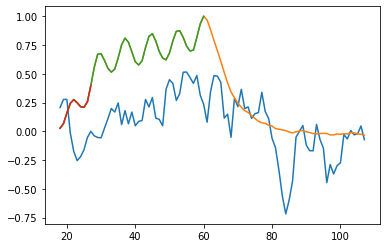

In [1439]:
cell_vec = deepcopy(mouse_sin_stage_respones[mouse][s][180, :, 3])
cell_vec[:18] = np.nan

# sns.heatmap(mouse_sin_stage_respones[mouse][s][:, :, 3])
plt.plot(mouse_sin_stage_respones[mouse][s][77, :, 3])
plt.plot(mouse_sin_stage_respones[mouse][s][180, :, 3])
# peak_time = np.nanargmax(mouse_sin_stage_respones[mouse][s][180, :, 3], axis=1)
# plt.plot(np.arange(len(cell_vec)), cell_vec)
# time to half peak
peak_time = np.nanargmax(cell_vec)
cell_vec[(peak_time + 1):] = np.nan
plt.plot(np.arange(len(cell_vec)), cell_vec)
max_val = np.nanmax(cell_vec)
cell_vec[cell_vec > max_val/2] = np.nan
plt.plot(np.arange(len(cell_vec)), cell_vec)
half_vec = np.where(~np.isnan(cell_vec))[0]
if all(np.diff(half_vec) == 1):
    half_latency = half_vec[-1]
else:
    half_latency = half_vec[np.diff(half_vec) > 1][0]  # take first half-peak threshold crossing


## looking at fitting results (parameter distributions)
- updated the lower bound of "c" to be -1, this might improve the fitting results a lot, before if it couldn't shift negative the necessary shift was the (period - the shift) since the fit would have to shift one full cycle forward to correctly fit
- this change does seem to slow the fit process
- checking how expanded b values (period) affect fitting --> _expanded b (6, 20), hurts fitting_
    - lower bound should not quite allow doubling or halving I think 
    - center: for 2 Hz, period is 0.5 sec, b = 12.56
    - half: for 1 Hz, period is 1 sec, b = 6.28
    - double: for 3 Hz, period is 0.33 sec, b = 19.04
        - for 1.25 Hz, T = 0.8 sec, b = 7.85
        - for 2.75 Hz, T = 0.364 sec, b = 17.26
- I think it makes the most sense to assess 2 Hz frequency locking and phase shift therein, this allows a reasonable comparison between cells for shuffle (otherwise you have unmatched periods)
        - for 2.25 Hz, T = 0.444 sec, b = 14.3
        - for 1.75 Hz, T = 0.571 sec, b = 11.0

Text(0.5, 1.0, 'Cells >= 0.7 r^2')

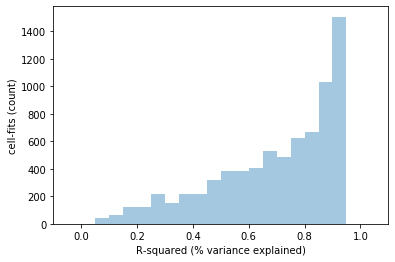

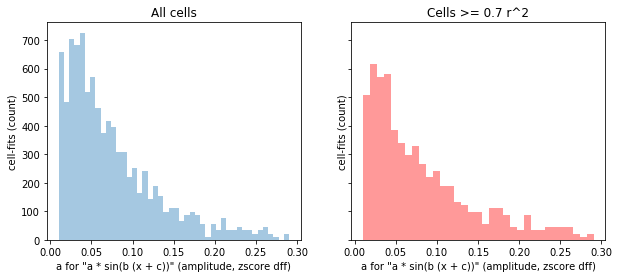

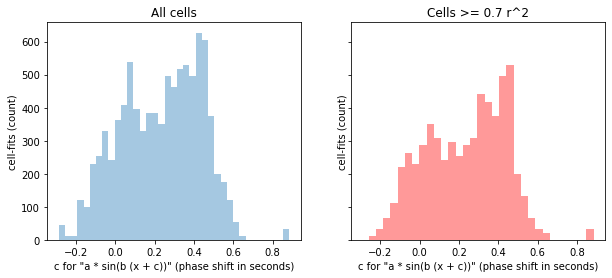

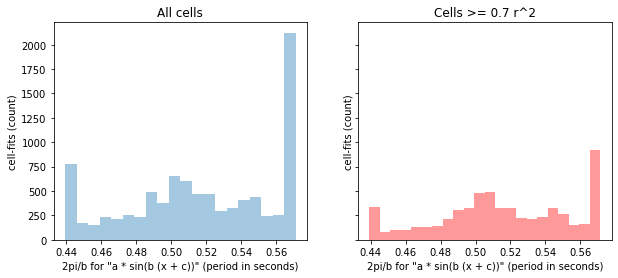

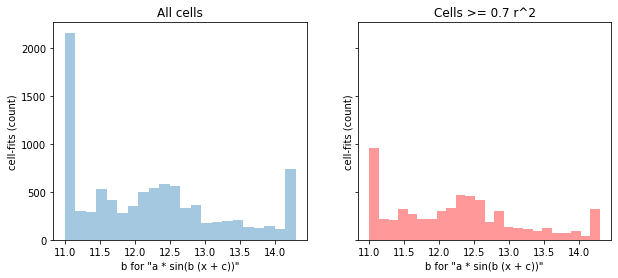

In [1505]:
vthresh = 0.7

all_fits = []
for mouse in cas.lookups.mice['all12']:
    for stage_i in cas.lookups.staging['parsed_11stage']:
        all_fits.append(mouse_sin_fits[mouse][s][:,:])
all_fits = np.vstack(all_fits)
all_fits.shape

amplitudes = all_fits[:, 0]
r2 = all_fits[:, 5]
phase_shifts = all_fits[:, 2]
period = 2*np.pi/all_fits[:, 1]
bb = all_fits[:, 1]

plt.figure()
sns.distplot(r2[~np.isnan(r2)], bins=np.arange(0, 1, 0.05), kde=False)
plt.xlim([-0.1, 1.1])
plt.ylabel('cell-fits (count)')
plt.xlabel('R-squared (% variance explained)')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
sns.distplot(amplitudes[~np.isnan(amplitudes)], kde=False, ax=ax[0])
sns.distplot(amplitudes[~np.isnan(amplitudes) & (r2 >= vthresh)], kde=False, ax=ax[1], color='red')
for axi in ax:
    axi.set_ylabel('cell-fits (count)')
    axi.set_xlabel('a for "a * sin(b (x + c))" (amplitude, zscore dff)')
ax[0].set_title('All cells')
ax[1].set_title(f'Cells >= {vthresh} r^2')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
sns.distplot(phase_shifts[~np.isnan(phase_shifts)], kde=False, ax=ax[0])
sns.distplot(phase_shifts[~np.isnan(phase_shifts) & (r2 >= vthresh)], kde=False, ax=ax[1], color='red')
for axi in ax:
    axi.set_ylabel('cell-fits (count)')
    axi.set_xlabel('c for "a * sin(b (x + c))" (phase shift in seconds)')
ax[0].set_title('All cells')
ax[1].set_title(f'Cells >= {vthresh} r^2')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
sns.distplot(period[~np.isnan(period)], kde=False, ax=ax[0])
sns.distplot(period[~np.isnan(period) & (r2 >= vthresh)], kde=False, ax=ax[1], color='red')
for axi in ax:
    axi.set_ylabel('cell-fits (count)')
    axi.set_xlabel('2pi/b for "a * sin(b (x + c))" (period in seconds)')
ax[0].set_title('All cells')
ax[1].set_title(f'Cells >= {vthresh} r^2')

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,4))
sns.distplot(bb[~np.isnan(bb)], kde=False, ax=ax[0])
sns.distplot(bb[~np.isnan(bb) & (r2 >= vthresh)], kde=False, ax=ax[1], color='red')
for axi in ax:
    axi.set_ylabel('cell-fits (count)')
    axi.set_xlabel('b for "a * sin(b (x + c))"')
ax[0].set_title('All cells')
ax[1].set_title(f'Cells >= {vthresh} r^2')

## summary of peak amplitude and latency

Text(0.5, 1.0, 'Sinusoid amplitude vs slope, hue = F1F0\nA * sin(B (x + C)) + Dx + E')

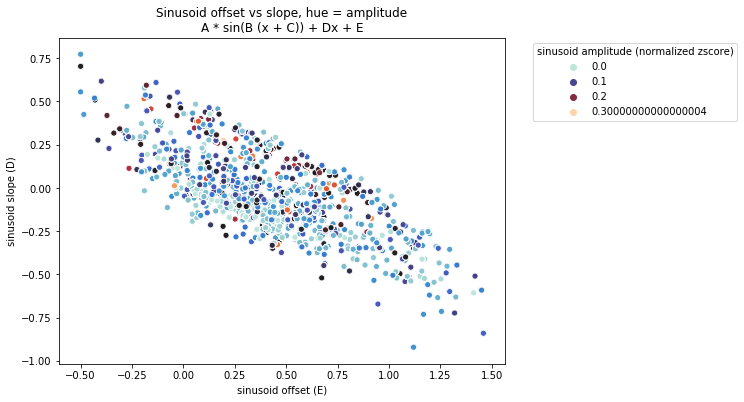

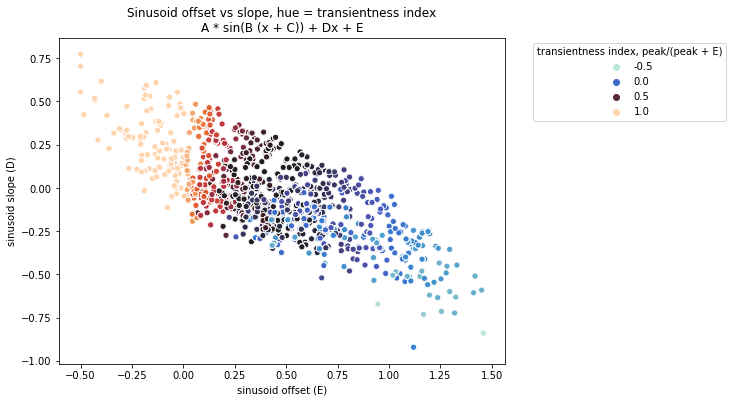

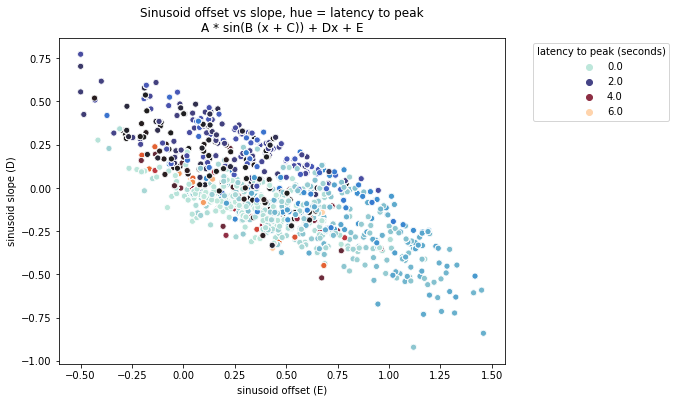

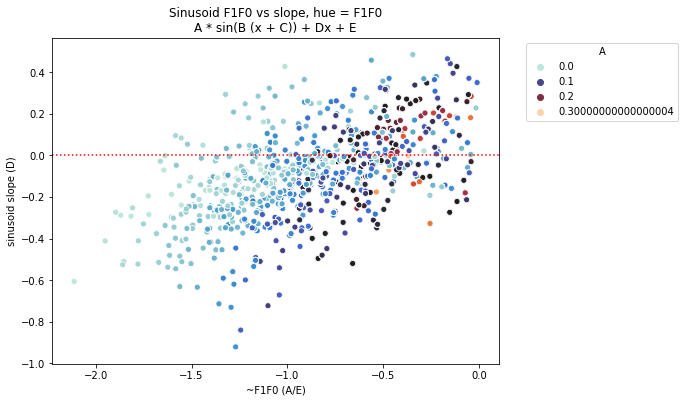

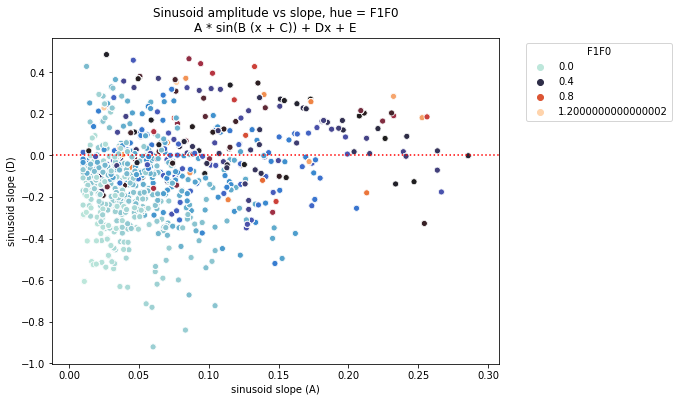

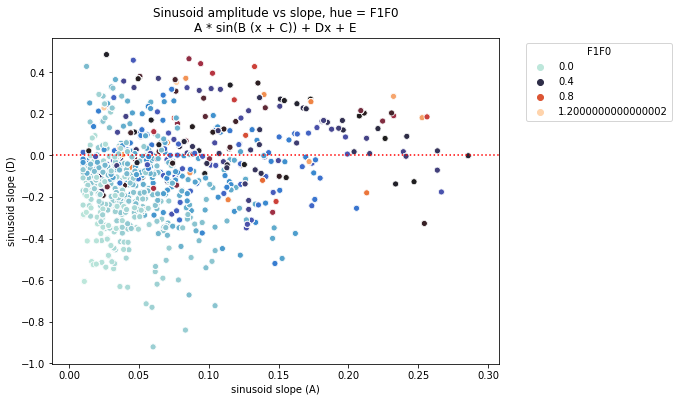

In [1515]:
all_peak_amp = []
all_half_lat = []
all_peak_lat = []
all_stage_vec = []
for mouse in cas.lookups.mice['all12']:
    for stage_i in cas.lookups.staging['parsed_11stage']:
#         if 'reversal' in stage_i:
#             continue
        all_stage_vec.append([stage_i] * len(mouse_peak_fits[mouse][s]['peak_latency']))
        all_peak_amp.append(mouse_peak_fits[mouse][s]['transientness_ind_C']) #transientness_ind_A
        all_peak_lat.append(mouse_peak_fits[mouse][s]['peak_latency'])
        all_half_lat.append(mouse_peak_fits[mouse][s]['half_peak_latency'])
all_peak_amp = np.concatenate(all_peak_amp)
all_peak_lat = np.concatenate(all_peak_lat)
all_half_lat = np.concatenate(all_half_lat)
all_fits.shape

# all_peak_amp[(all_peak_amp < 0) | (all_peak_amp > 2)] = np.nan  # prevent divide by tiny numbers breaking things

F1F0 = (all_fits[:, 0]/all_fits[:, 4])
# F1F0[(all_fits[:, 0] <= 0.01) | (all_fits[:, 4] <= 0.1)] = np.nan
F1F0[all_fits[:, 0] > all_fits[:, 4]] = np.nan
# F1F0[F1F0 > 1] = np.nan
# F1F0[F1F0 >1] = np.nan

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_fits[:, 4], y=all_fits[:, 3], hue=all_fits[:, 0], palette="icefire",) #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='sinusoid amplitude (normalized zscore)')
plt.xlabel('sinusoid offset (E)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid offset vs slope, hue = amplitude\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_fits[:, 4], y=all_fits[:, 3], hue=all_peak_amp, palette="icefire",) #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='transientness index, peak/(peak + E)')
plt.xlabel('sinusoid offset (E)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid offset vs slope, hue = transientness index\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_fits[:, 4], y=all_fits[:, 3], hue=all_peak_lat, palette="icefire",) #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='latency to peak (seconds)')
plt.xlabel('sinusoid offset (E)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid offset vs slope, hue = latency to peak\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=np.log10(F1F0), y=all_fits[:, 3], hue=all_fits[:, 0], palette="icefire") #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='A')
plt.axhline(0, color='red', linestyle=':')
plt.xlabel('~F1F0 (A/E)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid F1F0 vs slope, hue = F1F0\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_fits[:, 0], y=all_fits[:, 3], hue=F1F0, palette="icefire") #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='F1F0')
plt.axhline(0, color='red', linestyle=':')
plt.xlabel('sinusoid slope (A)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid amplitude vs slope, hue = F1F0\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_fits[:, 0], y=all_fits[:, 3], hue=F1F0, palette="icefire") #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='F1F0')
plt.axhline(0, color='red', linestyle=':')
plt.xlabel('sinusoid slope (A)')
plt.ylabel('sinusoid slope (D)')
plt.title('Sinusoid amplitude vs slope, hue = F1F0\nA * sin(B (x + C)) + Dx + E')

### Mark's scatter
- x --> a/e (fit from L1, we can predict the future) this is F1/F0 early basically
- y --> transient-ness peak/e
- hue --> delta transientness (L5 - L1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice


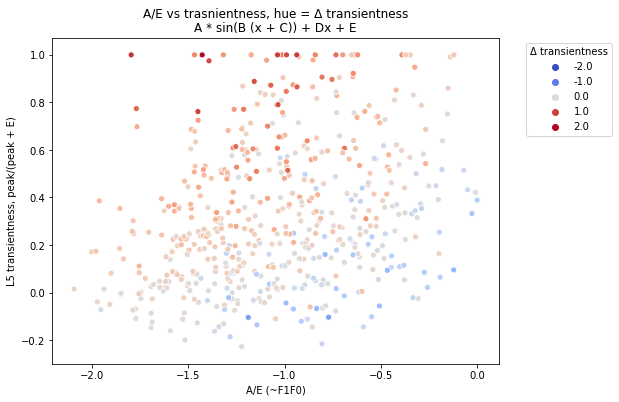

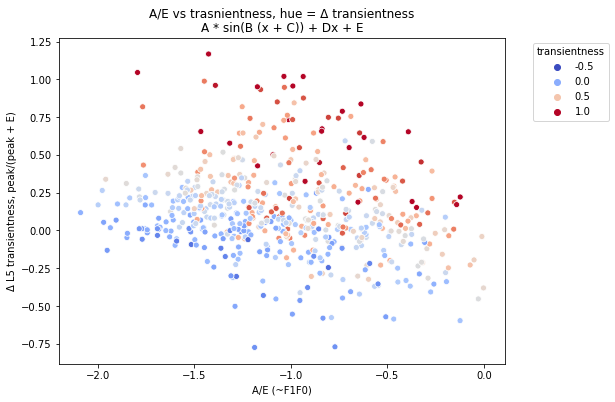

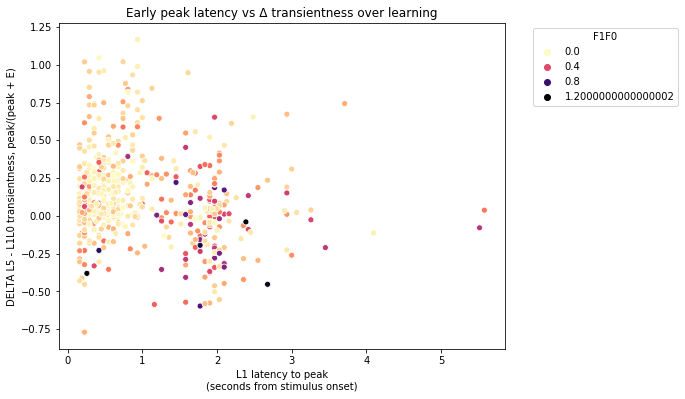

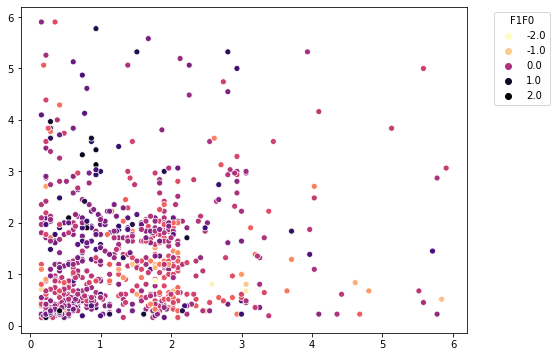

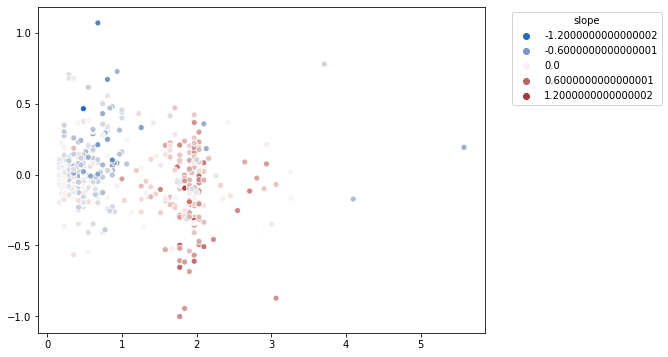

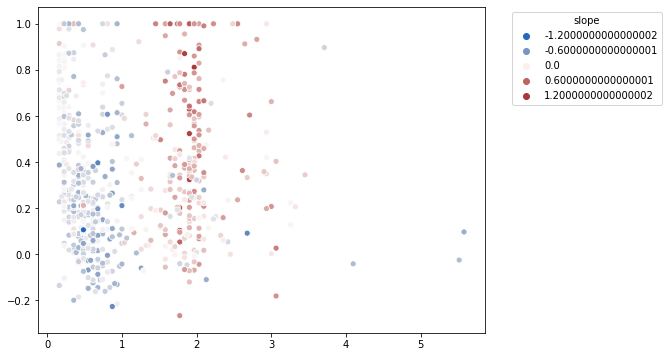

In [1576]:

all_delta_trans = []
all_trans = []
all_AE = []
all_lat = []
late_lat = []
all_amp = []
all_D = []
all_delta_D = []
for mouse in cas.lookups.mice['all12']:
    
    # get early and late learning transientness for each mouse
    naive = mouse_peak_fits[mouse]['L0 naive']['transientness_ind_C']
    early = mouse_peak_fits[mouse]['L1 learning']['transientness_ind_C']
    naive_early = np.nanmean(np.concatenate([naive[:, None, None], early[:, None, None]], axis=2), axis=2)
    naive_early = np.squeeze(naive_early)
    late1 = mouse_peak_fits[mouse]['L4 learning']['transientness_ind_C']
    late2 = mouse_peak_fits[mouse]['L5 learning']['transientness_ind_C']
    late_late = np.nanmean(np.concatenate([late1[:, None, None], late2[:, None, None]], axis=2), axis=2)
    late_late = np.squeeze(late_late)
    late = mouse_peak_fits[mouse]['L5 learning']['transientness_ind_C']
    all_trans.append(late_late)
    
    # get early vs late change in transientness 
    delta_trans = late_late - naive_early
    all_delta_trans.append(delta_trans)
    
    # early latency
    naive = mouse_peak_fits[mouse]['L0 naive']['peak_latency']
    early = mouse_peak_fits[mouse]['L1 learning']['peak_latency']
    naive_early = np.nanmean(np.concatenate([naive[:, None, None], early[:, None, None]], axis=2), axis=2)
    naive_early = np.squeeze(naive_early)
#     naive_early[naive_early > 1] = np.nan
    late1 = mouse_peak_fits[mouse]['L4 learning']['peak_latency']
    late2 = mouse_peak_fits[mouse]['L5 learning']['peak_latency']
    late_late = np.nanmean(np.concatenate([late1[:, None, None], late2[:, None, None]], axis=2), axis=2)
    late_late = np.squeeze(late_late)
    all_lat.append(naive_early)
    late_lat.append(late_late)
    
    # early AE
    naive = mouse_sin_fits[mouse]['L0 naive']
    early = mouse_sin_fits[mouse]['L1 learning']
    naive_early_AE = np.nanmean(np.concatenate([naive[:, None, None], early[:, None, None]], axis=2), axis=2)
    naive_early_AE = np.squeeze(naive_early_AE)
    naive_early_AE[naive_early_AE[:, 5] < 0.7, :] = np.nan  # nan fits that weren't good
    A = naive_early_AE[:, 0]
    E = naive_early_AE[:, 4]
    AE = A/E
    AE[A > E] = np.nan
    all_AE.append(AE)
    
    # slope D
    naive = mouse_sin_fits[mouse]['L0 naive']
    early = mouse_sin_fits[mouse]['L1 learning']
    naive_early_AE = np.nanmean(np.concatenate([naive[:, None, None], early[:, None, None]], axis=2), axis=2)
    naive_early_AE = np.squeeze(naive_early_AE)
    naive_early_AE[naive_early_AE[:, 5] < 0.7, :] = np.nan  # nan fits that weren't good
    D = naive_early_AE[:, 3]
    all_D.append(D)
    
    # slope D
    late_D = deepcopy(mouse_sin_fits[mouse]['L5 learning'])
    late_D[late_D[:, 5] < 0.7, :] = np.nan
    late_D = late_D[:, 3]
    all_delta_D.append(late_D - D)
    
all_delta_trans = np.concatenate(all_delta_trans)
all_trans = np.concatenate(all_trans)
all_AE = np.concatenate(all_AE)
all_lat = np.concatenate(all_lat)
late_lat = np.concatenate(late_lat)
all_D = np.concatenate(all_D)
all_delta_D = np.concatenate(all_delta_D)

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=np.log10(all_AE), y=all_trans, hue=all_delta_trans, palette='coolwarm') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='\u0394 transientness')
plt.xlabel('A/E (~F1F0)')
plt.ylabel('L5 transientness, peak/(peak + E)')
plt.title('A/E vs trasnientness, hue = \u0394 transientness\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=np.log10(all_AE), y=all_delta_trans, hue=all_trans, palette='coolwarm') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='transientness')
plt.xlabel('A/E (~F1F0)')
plt.ylabel('\u0394 L5 transientness, peak/(peak + E)')
plt.title('A/E vs trasnientness, hue = \u0394 transientness\nA * sin(B (x + C)) + Dx + E')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_lat, y=all_delta_trans, hue=all_AE, palette='magma_r') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='F1F0')
plt.xlabel('L1 latency to peak\n(seconds from stimulus onset)')
plt.ylabel('DELTA L5 - L1L0 transientness, peak/(peak + E)')
plt.title('Early peak latency vs \u0394 transientness over learning')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_lat, y=late_lat, hue=all_delta_trans, palette='magma_r') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='F1F0')

plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_lat, y=all_delta_D, hue=all_D, palette='vlag') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='slope')


plt.figure(figsize=(8,6))
# plt.scatter(y=F1F0, x=all_peak_amp, c=all_fits[:, 3], cmap="vlag",) #vmin=-1, vmax=1, alpha=1)
sns.scatterplot(x=all_lat, y=all_trans, hue=all_D, palette='vlag') #vmin=-1, vmax=1, alpha=1)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title='slope')

In [1572]:
late_D = deepcopy(mouse_sin_fits[mouse]['L5 learning'])
late_D.shape

(127, 6)

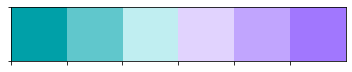

In [1366]:
sns.palplot(sns.diverging_palette(200, 275, s=100, l=60, n=10 as_cmap=False))

## plot summary of phase lag results

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
D:\Anaconda3\lib\site-packages\ipyker

Text(0.5, 0.98, 'All mice (n=12): phase consistency')

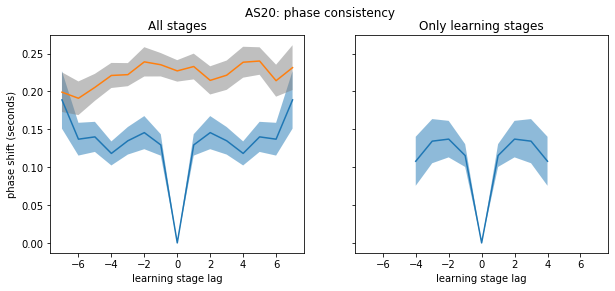

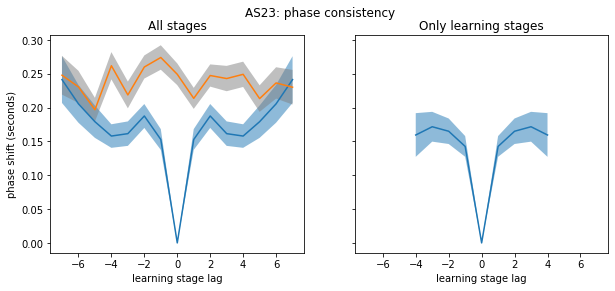

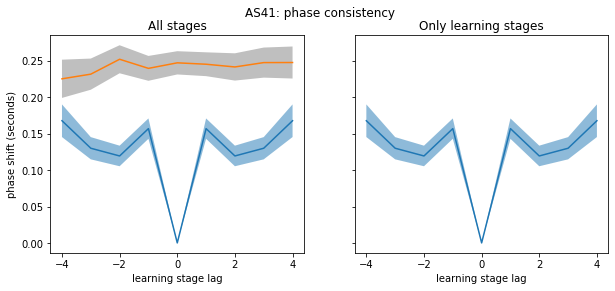

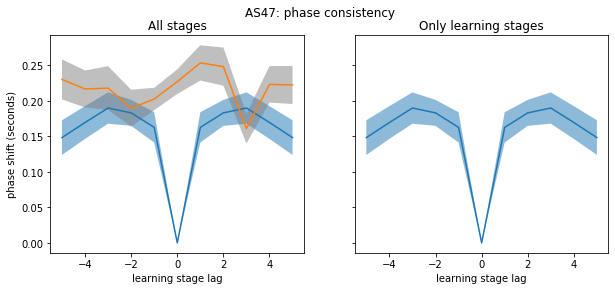

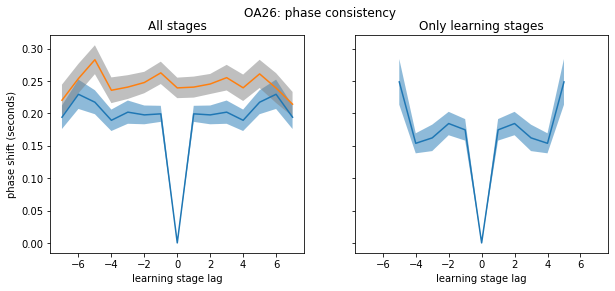

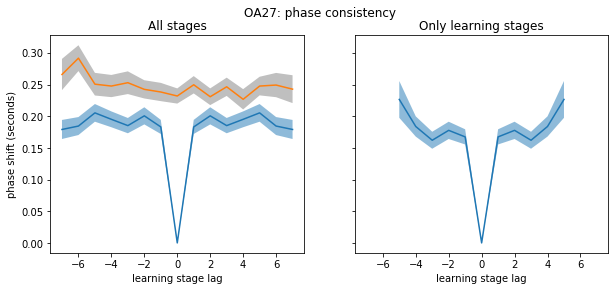

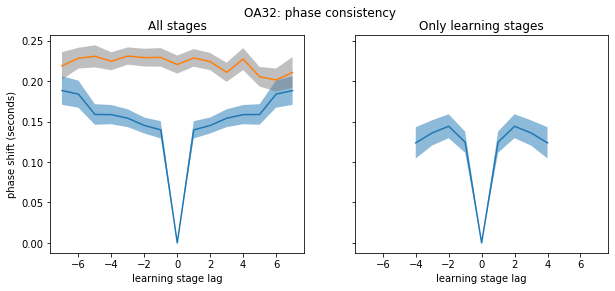

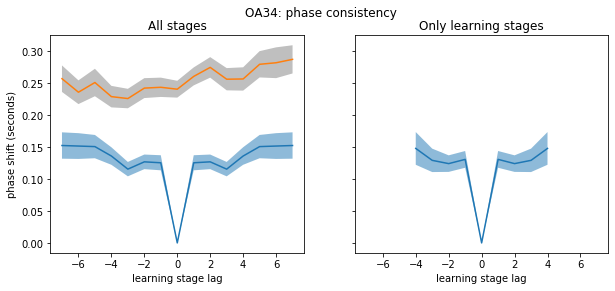

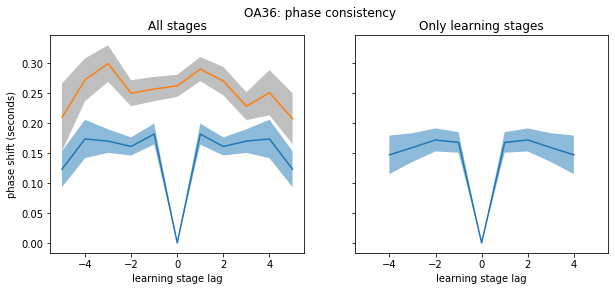

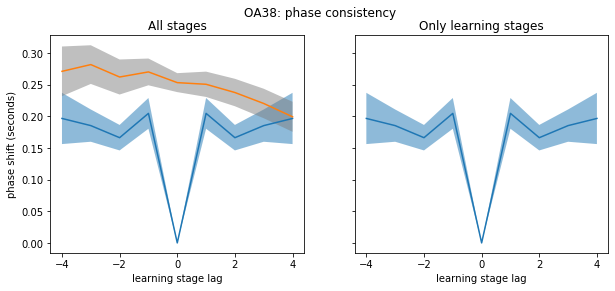

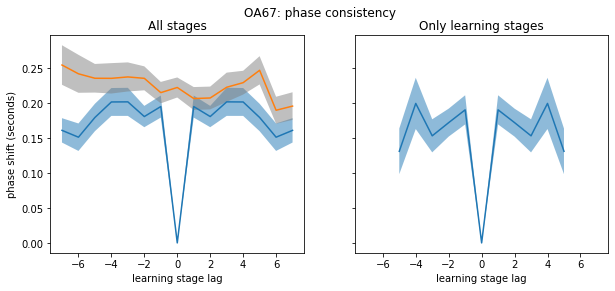

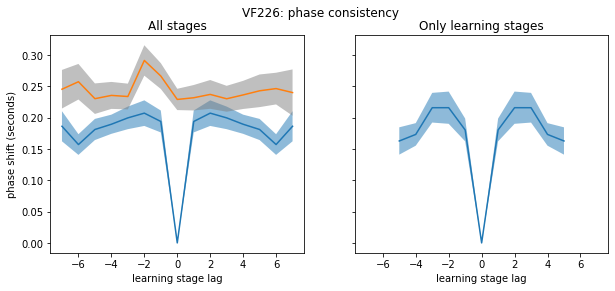

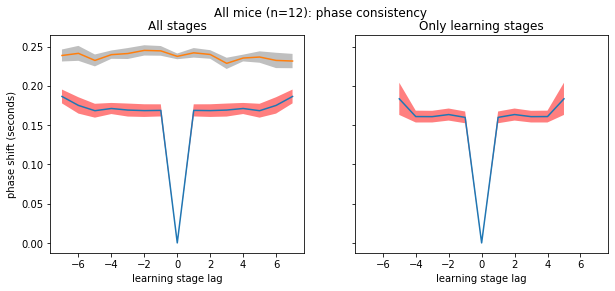

In [1562]:
lag_bins = np.arange(-5, 6, 1)
longer_lag_bins = np.arange(-7, 8, 1)

mouse_means = np.zeros((12, len(longer_lag_bins)))
mouse_means_shuffle = np.zeros((12, len(longer_lag_bins)))
mouse_means_l = np.zeros((12, len(lag_bins)))
for c_m, meta in enumerate(meta_list):
    
    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    flat_mat_all = mouse_phase_lags[mouse]['all_bins']
    flat_mat_all_shuffle = mouse_phase_lags[mouse]['all_bins_shuffle']
    flat_mat_learn = mouse_phase_lags[mouse]['only_learning_bins']

    fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)
    
    y_est = np.nanmean(flat_mat_all, axis=0)
    ax[0].plot(longer_lag_bins, np.nanmean(flat_mat_all, axis=0))
    sem = np.nanstd(flat_mat_all, axis=0)/np.sqrt(np.sum(~np.isnan(flat_mat_all), axis=0))
    ax[0].fill_between(longer_lag_bins, y_est-sem, y_est+sem, alpha=0.5)
    ax[0].set_ylabel('phase shift (seconds)')
    ax[0].set_xlabel('learning stage lag')
    ax[0].set_title('All stages')
    
    # save for later
    mouse_means[c_m, :] = y_est
    
    # shuffle of cells for that same mouse 
    y_est = np.nanmean(flat_mat_all_shuffle, axis=0)
    ax[0].plot(longer_lag_bins, np.nanmean(flat_mat_all_shuffle, axis=0))
    sem = np.nanstd(flat_mat_all_shuffle, axis=0)/np.sqrt(np.sum(~np.isnan(flat_mat_all_shuffle), axis=0))
    ax[0].fill_between(longer_lag_bins, y_est-sem, y_est+sem, alpha=0.5, facecolor='gray')
    
    # save for later
    mouse_means_shuffle[c_m, :] = y_est
    
    y_est = np.nanmean(flat_mat_learn, axis=0)
    ax[1].plot(lag_bins, np.nanmean(flat_mat_learn, axis=0))
    sem = np.nanstd(flat_mat_learn, axis=0)/np.sqrt(np.sum(~np.isnan(flat_mat_learn), axis=0))
    ax[1].fill_between(lag_bins, y_est-sem, y_est+sem, alpha=0.5)
    ax[1].set_xlabel('learning stage lag')
    ax[1].set_title('Only learning stages')
    
    # save for later
    mouse_means_l[c_m, :] = y_est
    
    fig.suptitle(f'{mouse}: phase consistency')
#     plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/phase_shift_{mouse}.pdf', bbox_inches='tight')
    
fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey=True, sharex=True)

y_est = np.nanmean(mouse_means, axis=0)
ax[0].plot(longer_lag_bins, np.nanmean(mouse_means, axis=0))
sem = np.nanstd(mouse_means, axis=0)/np.sqrt(np.sum(~np.isnan(mouse_means), axis=0))
ax[0].fill_between(longer_lag_bins, y_est-sem, y_est+sem, alpha=0.5, facecolor='red')
ax[0].set_ylabel('phase shift (seconds)')
ax[0].set_xlabel('learning stage lag')
ax[0].set_title('All stages')

# shuffle of cells for that same mouse 
y_est = np.nanmean(mouse_means_shuffle, axis=0)
ax[0].plot(longer_lag_bins, np.nanmean(mouse_means_shuffle, axis=0))
sem = np.nanstd(mouse_means_shuffle, axis=0)/np.sqrt(np.sum(~np.isnan(mouse_means_shuffle), axis=0))
ax[0].fill_between(longer_lag_bins, y_est-sem, y_est+sem, alpha=0.5, facecolor='gray')

y_est = np.nanmean(mouse_means_l, axis=0)
ax[1].plot(lag_bins, np.nanmean(mouse_means_l, axis=0))
sem = np.nanstd(mouse_means_l, axis=0)/np.sqrt(np.sum(~np.isnan(mouse_means_l), axis=0))
ax[1].fill_between(lag_bins, y_est-sem, y_est+sem, alpha=0.5, facecolor='red')
ax[1].set_xlabel('learning stage lag')
ax[1].set_title('Only learning stages')

fig.suptitle('All mice (n=12): phase consistency')
# plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/phase_shift_allmice.pdf', bbox_inches='tight')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
D:\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


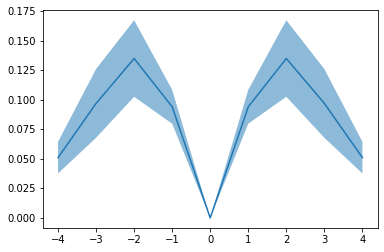

In [1095]:
y_est = np.nanmean(flat_mat_learn, axis=0)
plt.plot(lag_bins, np.nanmean(flat_mat_learn, axis=0))
sem = np.nanstd(flat_mat_learn, axis=0)/np.sqrt(np.sum(~np.isnan(flat_mat_learn), axis=0))
plt.fill_between(lag_bins, y_est-sem, y_est+sem, alpha=0.5)

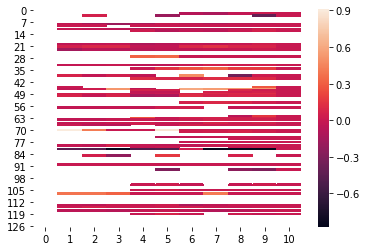

In [1060]:
sns.heatmap(phase_offset_mat - phase_offset_mat[:, c_s][:, None])

### testing fitting bounds for zscore data

In [ ]:
pref_chunk = mouse_sin_stage_respones[mouse][s][74, 21:47, 3]
plt.scatter(x_data, pref_chunk, label='Data')
params, params_covariance = optimize.curve_fit(sin_func, x_data, pref_chunk, p0=[0.1, 12, 0.2, 0.1, 0.1],
                                                               bounds=((0.01, 10, 0,  -10, 0), (10, 15, 5, 10, 10)))
plt.plot(x_data, sin_func(x_data, params[0], params[1], params[2], params[3], params[4]),
         label='Fitted function')

plt.legend(loc='best') # bounds=((0.01, 0.3), (11, 14), (0, 1), (-1, 1), (0, 1)

### looking at raw parameter values

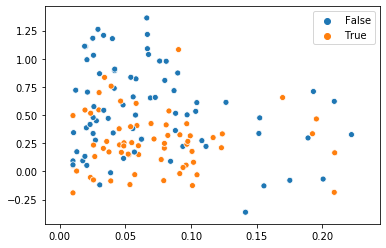

In [1564]:
mouse_sin_fits[mouse]['L5 learning']
# sns.heatmap(mouse_sin_stage_respones[mouse][s][:,:, 3])
sns.scatterplot(x=mouse_sin_fits[mouse]['L5 learning'][:, 0],
                y=mouse_sin_fits[mouse]['L5 learning'][:, 4],
                hue=mouse_sin_fits[mouse]['L5 learning'][:,5]<0.7)

### check cells that were fit for a single stage of learning

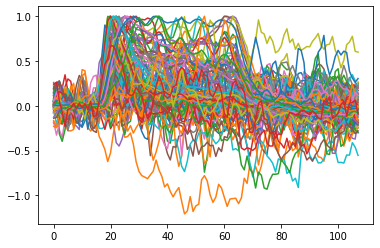

In [1166]:
plt.plot(mouse_sin_stage_respones[mouse]['L4 learning'][mouse_sin_fits[mouse]['L4 learning'][:,5]>0.5, :, 3].T);

In [874]:
tune.head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning    minus-neutral   
      1        L1 reversal1            minus   
      1         L2 learning       plus-minus   
      1        L2 reversal1            broad   
      1         L3 learning            minus   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.22195272423734047, 0.4477677659532566, 0.70...   
      1       [0.13351864981687445, 0.6820032732791814, 0.61...   
      1       [0.49194837333803276, 0.6623026712331795, 0.20...   
      1       [0.41818581075125427, 0.39920909687078043, 0.4...   
      1       [0.06984632071265451, 0.7813822357287312, 0.70...   

                                                  mean response  \
mouse cell_n                                                      
AS20  1       [0.8102384683903909, 0.253379828377761, 0.1496...   
      1       [0.9439842162454425, 0.1955947896692426, 0.367...   
      1       [0.32479159592600865, 0.3200015469668996, 0.84...   
      1       [0.7500456289082826, 0.792864301511142, 0.7584...   
      1       [0.815679012100353, 0.03626748304838481, 0.125...   

              best component  offset component  offset cell  \
mouse cell_n                                                  
AS20  1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   
      1                  1.0               1.0         True   

              component participation  offset participation  
mouse cell_n                                                 
AS20  1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True  
      1                            15                  True

# TSNE on sin() fit results

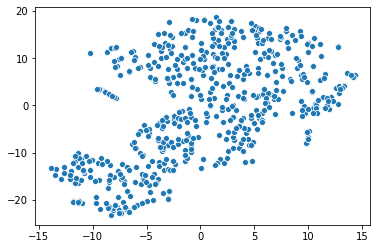

In [1045]:
from sklearn import manifold
tune = tuning_list_ori[0]

fit_list = []
tune_list = []
stage_list = []
for s in xorder:
    fit_list.append(mouse_sin_fits[mouse][s])
    tune_bool = tune.reset_index().cell_n.isin(mouse_sin_cells[mouse]).values \
                & tune.parsed_11stage.isin([s]).values
    tune_vec = tune.loc[tune_bool, 'preferred tuning'].values
    if len(tune_vec) == 0:
        tune_vec = ['none'] * mouse_sin_fits[mouse][s].shape[0]
    stage_list.append([s] * mouse_sin_fits[mouse][s].shape[0])
    tune_list.append(tune_vec)
X1 = np.vstack(fit_list)
pref_tuning_vec = np.hstack(tune_list)
stage_vec = np.hstack(stage_list)

# limit to greater than 50% varex 
x_var_thresh = X1[:, 5]>0.8
X = X1[x_var_thresh, :-1]
pref_tuning_vec = pref_tuning_vec[x_var_thresh]
stage_vec = stage_vec[x_var_thresh]

tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=0, perplexity=50)
Y = tsne.fit_transform(X)

sns.scatterplot(Y[:,0], Y[:, 1])

### check that R2 threshold is reasonable 

(-0.1, 1.1)

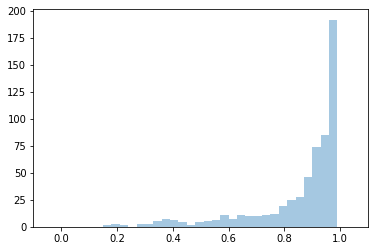

In [1046]:
varex_vec = X1[:, -1]
sns.distplot(varex_vec[~np.isnan(varex_vec)], bins=np.arange(0,1,.03), kde=False)
plt.xlim([-0.1, 1.1])

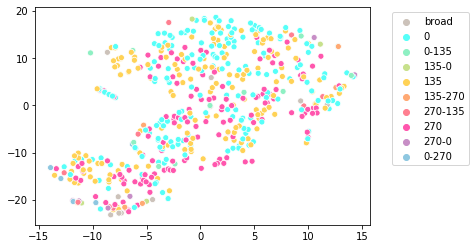

In [1047]:
# preferred orientation  
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
ori_order = ['broad', '0', '0-135', '135-0', '135', '135-270', '270-135', '270', '270-0', '0-270']
# sns.scatterplot(Y[:,0], Y[:, 1], hue=pref_tuning_vec, palette=cas.lookups.color_dict, hue_order=hue_order)
sns.scatterplot(Y[:,0], Y[:, 1], hue=pref_tuning_vec, palette=cas.lookups.color_dict, hue_order=ori_order)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

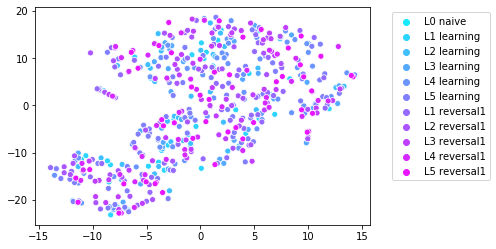

In [1048]:
# learning stages
sns.scatterplot(Y[:,0], Y[:, 1], hue=stage_vec, hue_order=xorder, palette='cool')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

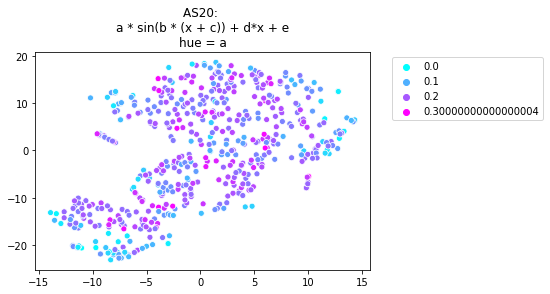

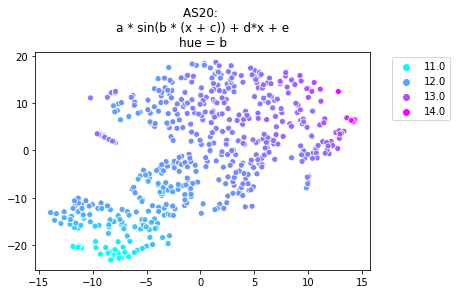

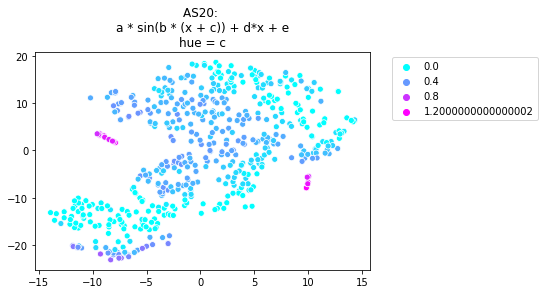

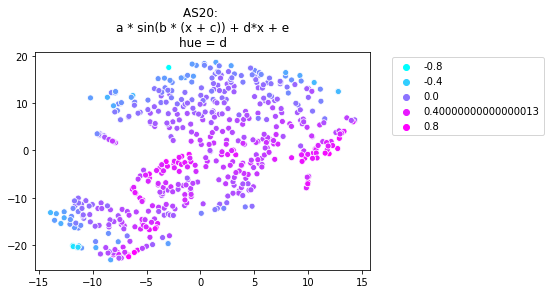

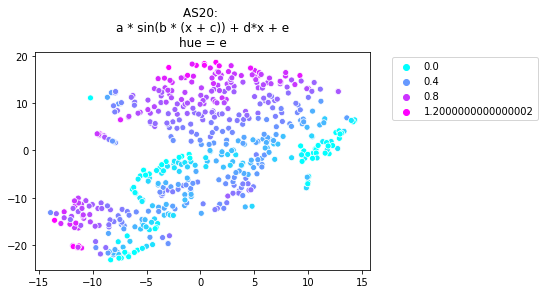

In [1049]:
# SIN fitting parameters 
for i in range(5):
    plt.figure()
    sns.scatterplot(x=Y[:,0], y=Y[:, 1], hue=X[:, i], palette='cool')
    par_options = ['a', 'b', 'c', 'd', 'e']
    plt.title(f'{mouse}: \na * sin(b * (x + c)) + d*x + e\nhue = {par_options[i]}')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# sns.scatterplot(x=Y[:,0], y=Y[:, 1], hue=X[:,4])
# plt.figure()
# sns.scatterplot(x=Y[:,0], y=Y[:, 1], hue=X[:,3])

## use cross correlation to check phase lag for hi F1/F0-like cells

In [510]:
# test using cross-correlation to check phase lag
from scipy.signal import correlate

pref_chunk = mouse_stage_respones[mouse]['L5 learning'][79,20:46,3]
pref_chunk2 = mouse_stage_respones[mouse]['L1 reversal1'][79,20:46,3]
xcorr_vec = np.correlate(pref_chunk, pref_chunk2, 'full')
phase_lag_frames = np.argmax(xcorr_vec) - np.ceil(len(xcorr_vec)/2)
phase_lag_ms = phase_lag_frames/15.5 * 1000
phase_lag_ms_abs = np.abs(phase_lag_ms)

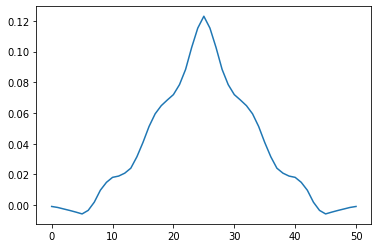

In [1050]:
plt.plot(xcorr_vec)

In [519]:
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = []
    x_data = np.arange(20, 46, 1)/15.5  # in seconds
    for cell_n in range(mouse_stage_respones[mouse]['L0 naive'].shape[0]):
        cell_mat = np.zeros((len(xorder), len(xorder)))
        cell_mat[:] = np.nan
        for c, s in enumerate(xorder):
            pref_chunk = mouse_stage_respones[mouse][s][cell_n,20:46,3]
            if np.isnan(pref_chunk).all():
                continue
            for c2, s2 in enumerate(xorder):
                pref_chunk2 = mouse_stage_respones[mouse][s2][cell_n,20:46,3]
                if np.isnan(pref_chunk2).all():
                    continue
                
                # calculate offset in ms from peak of cross-correlation (absolute value)
                xcorr_vec = np.correlate(pref_chunk, pref_chunk2, 'full')
                phase_lag_frames = np.argmax(xcorr_vec) - np.ceil(len(xcorr_vec)/2)
                phase_lag_ms = phase_lag_frames/15.5 * 1000
                phase_lag_ms_abs = np.abs(phase_lag_ms)
                
                cell_mat[c, c2] = phase_lag_ms_abs
                
        np.fill_diagonal(cell_mat, np.nan)

        break
    break

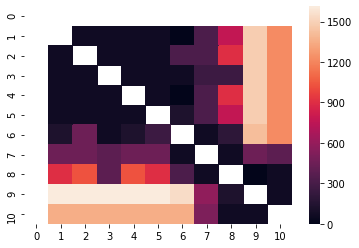

In [520]:
sns.heatmap(cell_mat)

# phase stability across cues/cue-types
- same as above, but use np.correlate to show phase stability for cells driven to different cues

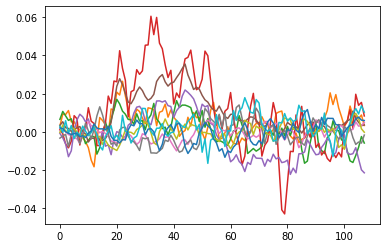

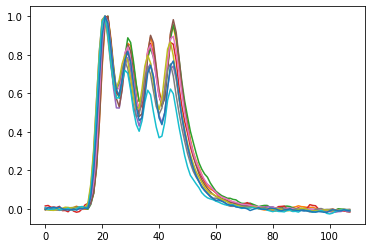

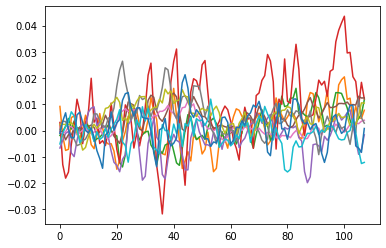

In [405]:
# phase_test = np.hstack(stage_list)

cell = 87
for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]
    
    stage_list = []
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,0])
    
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,1])
    
    plt.figure()
    for s in xorder:
#         stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
        plt.plot(mouse_stage_respones[mouse][s][cell,:,2])
    
    break

# correlate cells responses with themselves (across time) vs with other cells (same time)
- this is a partial argument against behavioral/motor confounds
- we may need to flag cells that come online or go offline across reversal (exclude online/offline cells)
    - this could also be done by removing cells whose trial factors are too low for that stage of learning
- could also just focus on learning for now

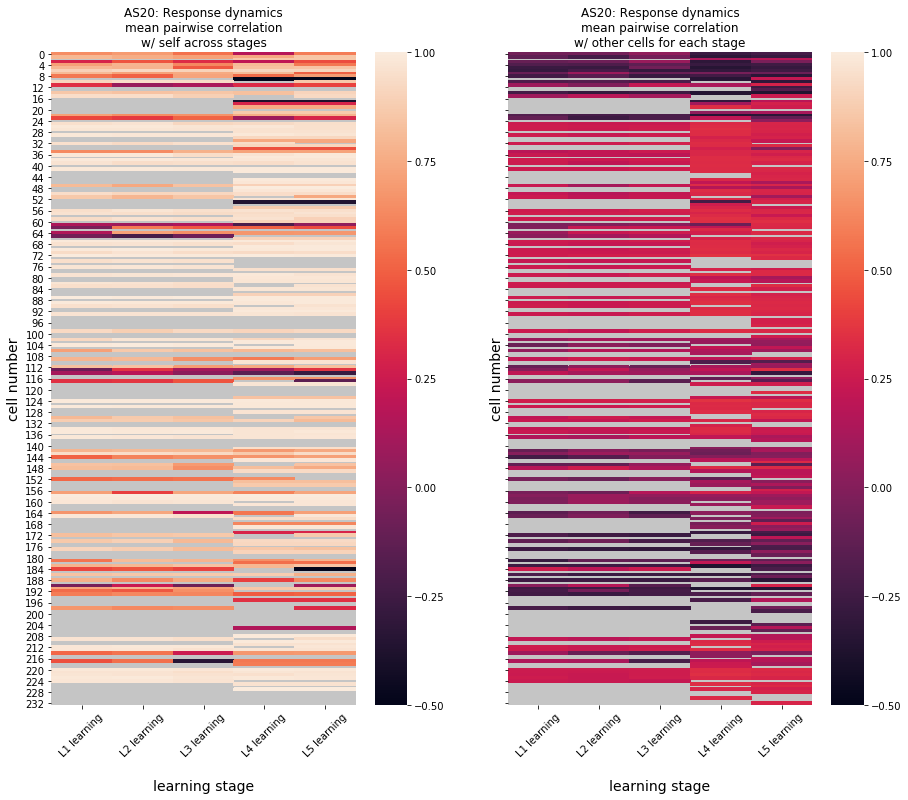

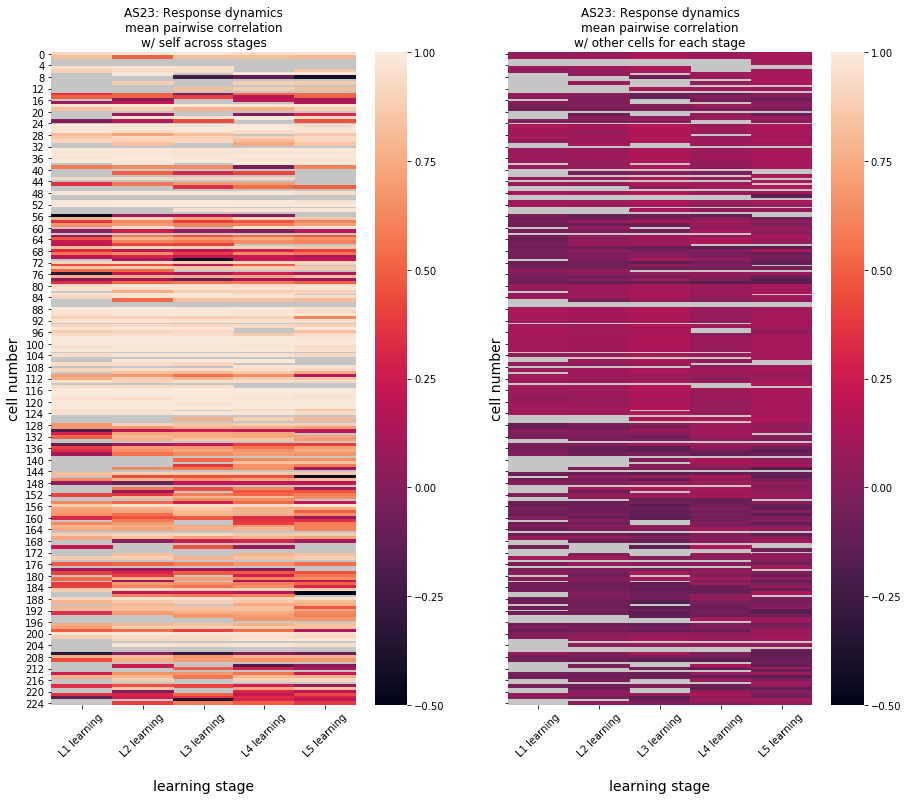

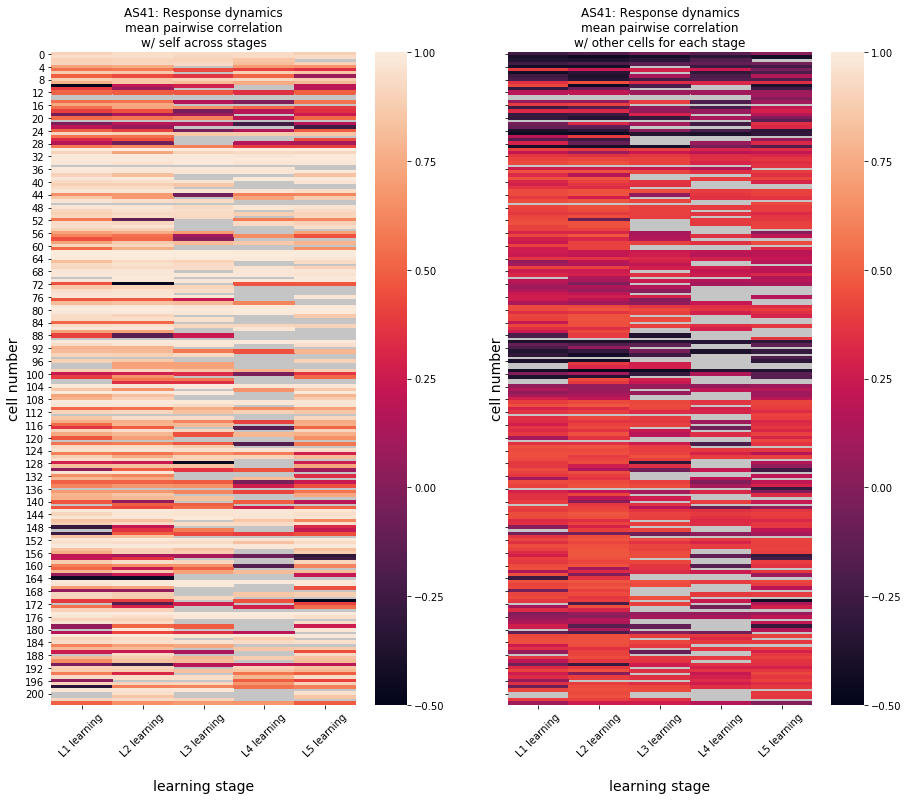

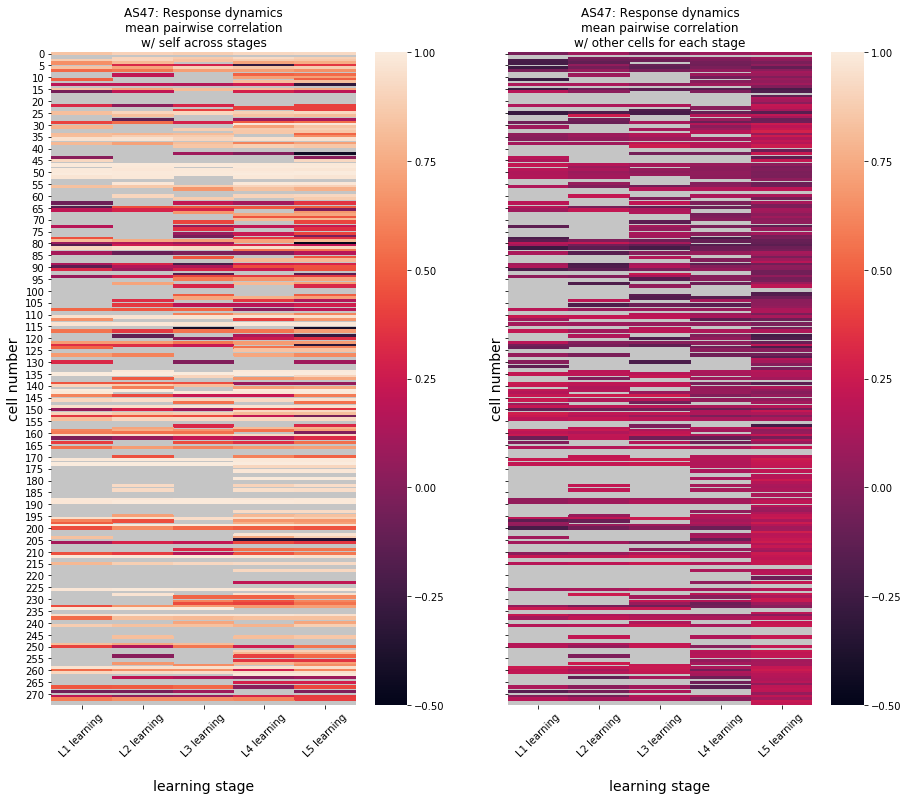

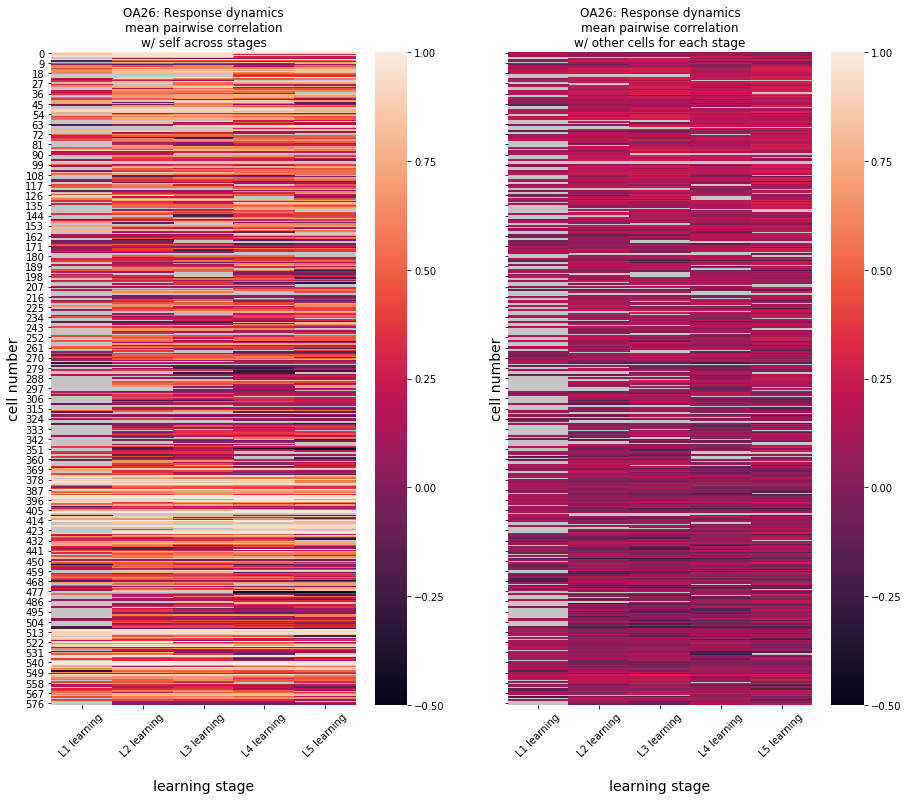

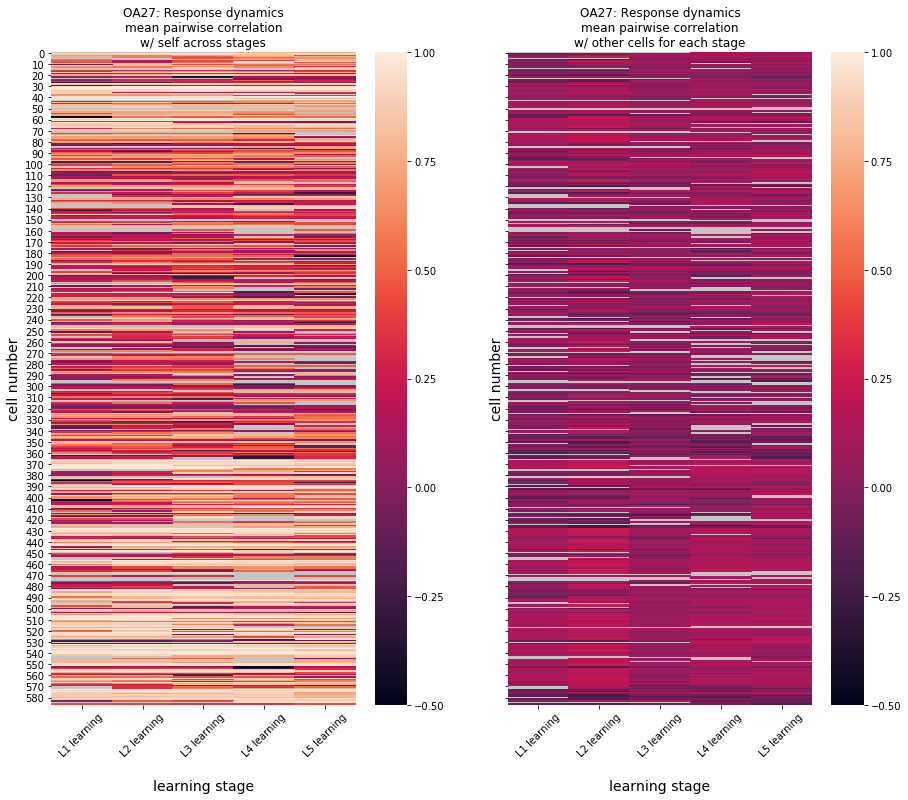

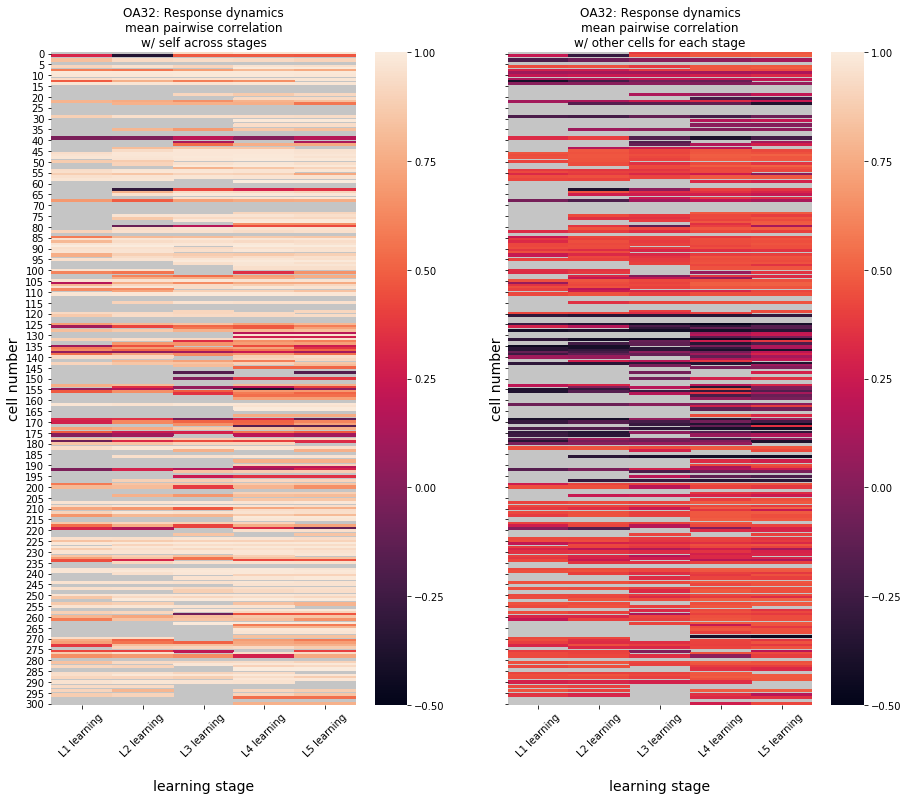

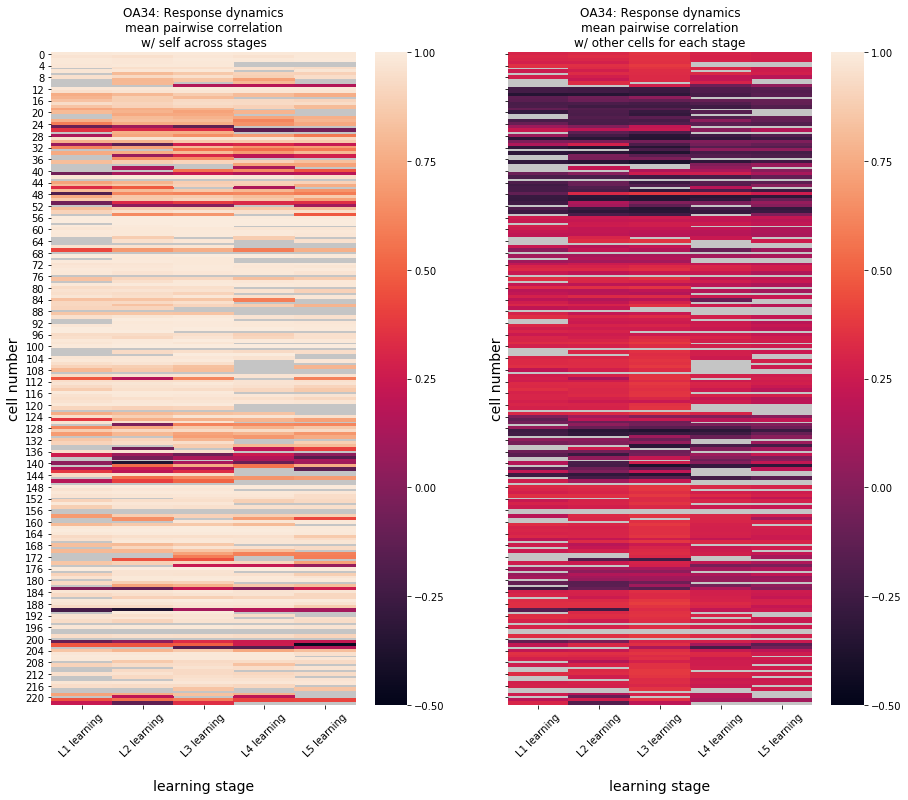

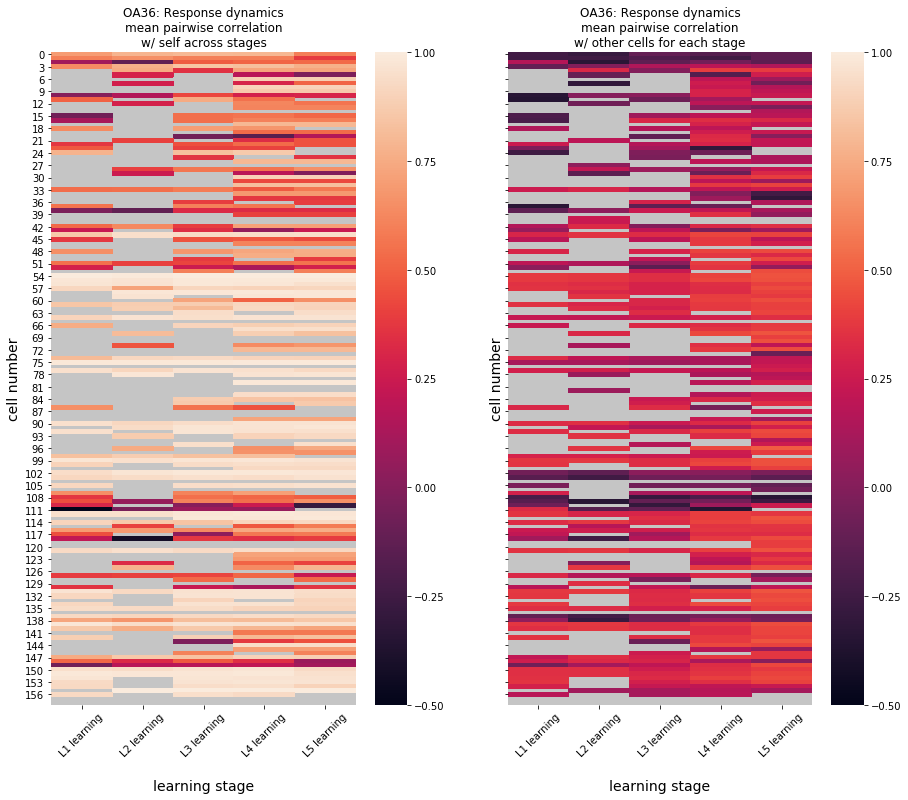

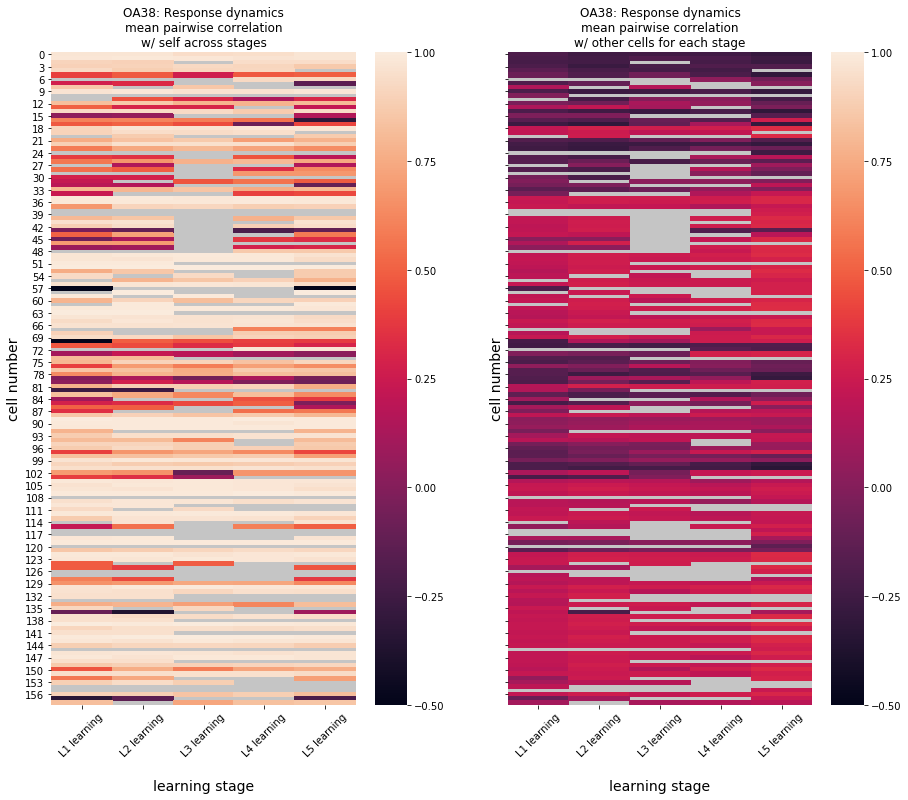

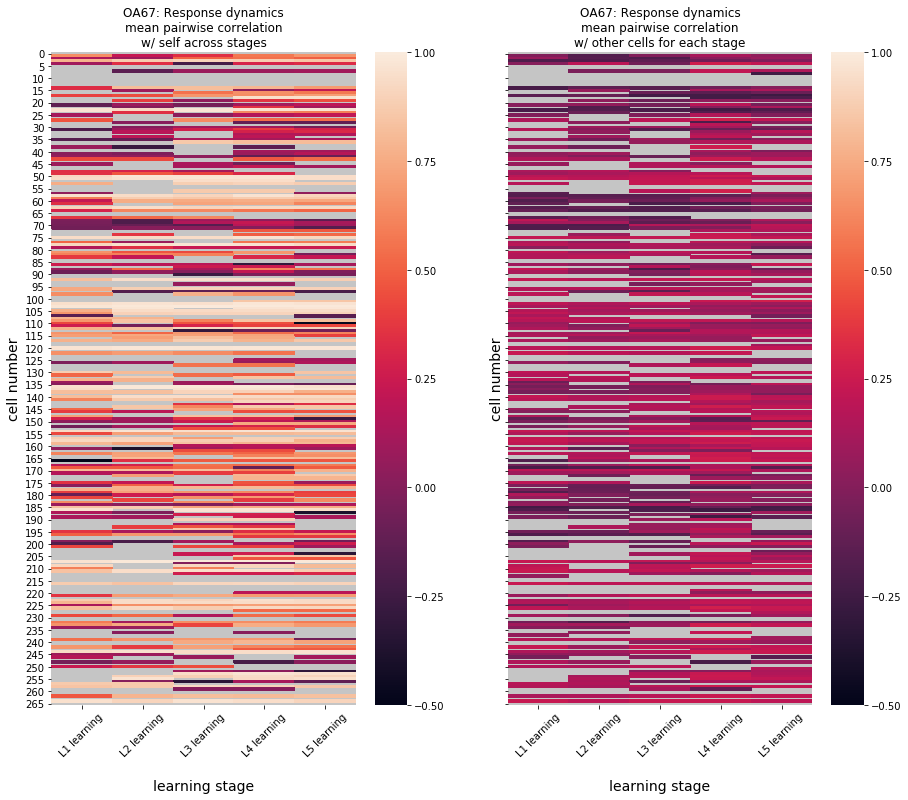

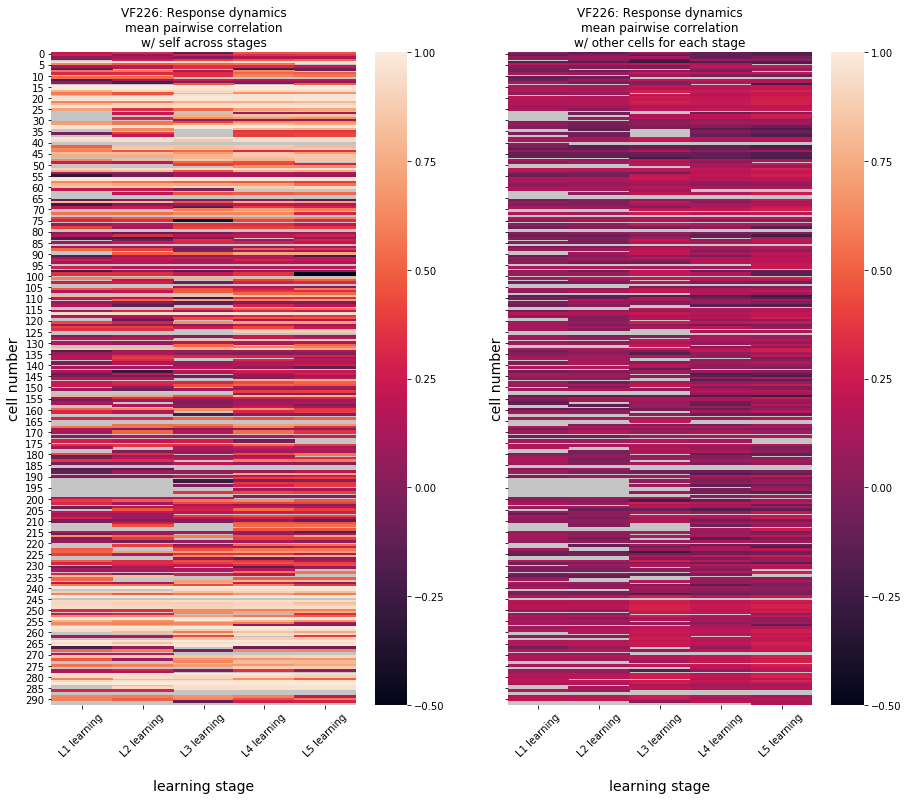

In [274]:
# two heatmaps (for every cell/stage)
#     1. mean correlation all pairwise for same cell compared to other stages
#     2. mean correlation all pairwise for cell compared to other cells same stage...

stages_to_correlate = ['L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning']

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]

    
    # heatmap 1 average pairwise corr across stages, same cell
    corr1_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr1_avgs[:] = np.nan
    for cell_n in range(mouse_stage_respones[mouse][s].shape[0]):
        
        # build a timepoints x stage matrix for each cell
        corr = np.zeros((mouse_stage_respones[mouse][s].shape[1], len(stages_to_correlate)))
        for c, s in enumerate(stages_to_correlate):
            corr[:, c] = mouse_stage_respones[mouse][s][cell_n,:,3]
        
        # account for nan stages
        fill_inds = np.where(~np.isnan(corr[0, :]))[0]
        corrmat = np.corrcoef(corr[:, fill_inds].T)
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_cell_other_stages = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr1_avgs[cell_n, fill_inds] = mean_corr_vec_same_cell_other_stages

        # need to decide how to do this correlation with regard to tuning.
        # point is that cells dynamics are the same between days of same cell rather than between cells 
        #    but should I then only focus on cells with the same tuning? 
            
    # heatmap 2 across cells, same stage
    corr2_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr2_avgs[:] = np.nan
    for c, s in enumerate(stages_to_correlate):
        
        # build a timepoints x stage matrix for each cell
        corr = mouse_stage_respones[mouse][s][:,:,3]
        
        # account for nan stages
        cell_inds = np.where(~np.isnan(corr[:, 0]))[0]
        corrmat = np.corrcoef(corr[cell_inds, :])
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_stage_other_cells = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr2_avgs[cell_inds, c] = mean_corr_vec_same_stage_other_cells
    
    fig, ax = plt.subplots(1,2, figsize=(15,12), sharey=True)
    g = sns.heatmap(corr1_avgs, ax=ax[0], vmax=1, vmin=-0.5)
    g.set_facecolor('#c5c5c5')
    h = sns.heatmap(corr2_avgs, ax=ax[1], vmax=1, vmin=-0.5)
    h.set_facecolor('#c5c5c5')

    ax[0].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
    ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

    for axi in ax:
        stim_starts = np.arange(len(stages_to_correlate))
        stim_labels = stages_to_correlate
#         axi.set_xticks(stim_starts)
        axi.set_xticklabels(stim_labels, rotation=45)
        axi.set_ylabel('cell number', size=14)
        axi.set_xlabel('\nlearning stage', size=14)
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_corr_heatmap_{mouse}.png', bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/pref_tuning_corr_heatmap_{mouse}.pdf', bbox_inches='tight')

## again as a megaheatmap with the traces

In [ ]:
# two heatmaps (for every cell/stage)
#     1. mean correlation all pairwise for same cell compared to other stages
#     2. mean correlation all pairwise for cell compared to other cells same stage...

stages_to_correlate = ['L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning']

for meta, tensor, model, tune in zip(meta_list, tensor_list, model_list, tuning_list):

    # which mouse is it?
    mouse = meta.reset_index()['mouse'].unique()[0]

    
    # heatmap 1 average pairwise corr across stages, same cell
    corr1_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr1_avgs[:] = np.nan
    for cell_n in range(mouse_stage_respones[mouse][s].shape[0]):
        
        # build a timepoints x stage matrix for each cell
        corr = np.zeros((mouse_stage_respones[mouse][s].shape[1], len(stages_to_correlate)))
        for c, s in enumerate(stages_to_correlate):
            corr[:, c] = mouse_stage_respones[mouse][s][cell_n,:,3]
        
        # account for nan stages
        fill_inds = np.where(~np.isnan(corr[0, :]))[0]
        corrmat = np.corrcoef(corr[:, fill_inds].T)
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_cell_other_stages = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr1_avgs[cell_n, fill_inds] = mean_corr_vec_same_cell_other_stages

        # need to decide how to do this correlation with regard to tuning.
        # point is that cells dynamics are the same between days of same cell rather than between cells 
        #    but should I then only focus on cells with the same tuning? 
            
    # heatmap 2 across cells, same stage
    corr2_avgs = np.zeros((mouse_stage_respones[mouse][s].shape[0], len(stages_to_correlate)))
    corr2_avgs[:] = np.nan
    for c, s in enumerate(stages_to_correlate):
        
        # build a timepoints x stage matrix for each cell
        corr = mouse_stage_respones[mouse][s][:,:,3]
        
        # account for nan stages
        cell_inds = np.where(~np.isnan(corr[:, 0]))[0]
        corrmat = np.corrcoef(corr[cell_inds, :])
        if corrmat.size <= 1:
            continue  # avoid only correlations with self
        np.fill_diagonal(corrmat, np.nan)  # inplace 
        mean_corr_vec_same_stage_other_cells = np.nanmean(corrmat, axis=0)
        
        # add to matrix for all cells 
        corr2_avgs[cell_inds, c] = mean_corr_vec_same_stage_other_cells
    
    
    # PLOTTING +_+_+_+_+__++_+_+_+_+__+_++_++_
    
    fig, ax = plt.subplots(1,3, figsize=(20,12), sharey=True)

    
    stage_list = [] 
    for s in xorder:
        stage_list.append(mouse_stage_respones[mouse][s][:,:,3])
    fig, ax = plt.subplots(1,1, figsize=(15,15))
    g = sns.heatmap(np.hstack(stage_list), vmin=-1, ax=ax[0], cmap=cmap)
    g.set_facecolor('#c5c5c5')
    ax[0].set_title(f'{mouse}: preferred tuning responses, 11 sequential stages of learning\n', size=16)
    stim_starts = [15.5 + 108*s for s in np.arange(len(xorder))]
    stim_labels = [f'0\n\n{s}' if c%2 == 0 else f'0\n{s}' for c, s in enumerate(xorder)]
    ax[0].set_xticks(stim_starts)
    ax[0].set_xticklabels(stim_labels, rotation=45)
    ax[0].set_ylabel('cell number', size=14)
    ax[0].set_xlabel('\ntime from stimulus onset (sec)', size=14)
    
    
    g = sns.heatmap(corr1_avgs, ax=ax[1], vmax=1, vmin=-0.5)
    g.set_facecolor('#c5c5c5')
    h = sns.heatmap(corr2_avgs, ax=ax[2], vmax=1, vmin=-0.5)
    h.set_facecolor('#c5c5c5')

    ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
    ax[2].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

    for axi in ax[1:]:
        stim_starts = np.arange(len(stages_to_correlate))
        stim_labels = stages_to_correlate
#         axi.set_xticks(stim_starts)
        axi.set_xticklabels(stim_labels, rotation=45)
        axi.set_ylabel('cell number', size=14)
        axi.set_xlabel('\nlearning stage', size=14)
        
    break
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/tuning_and_corr_heatmap_{mouse}.png', bbox_inches='tight')
    plt.savefig(f'/twophoton_analysis/Data/analysis/Group-attractive/tuning_and_corr_heatmap_{mouse}.pdf', bbox_inches='tight')

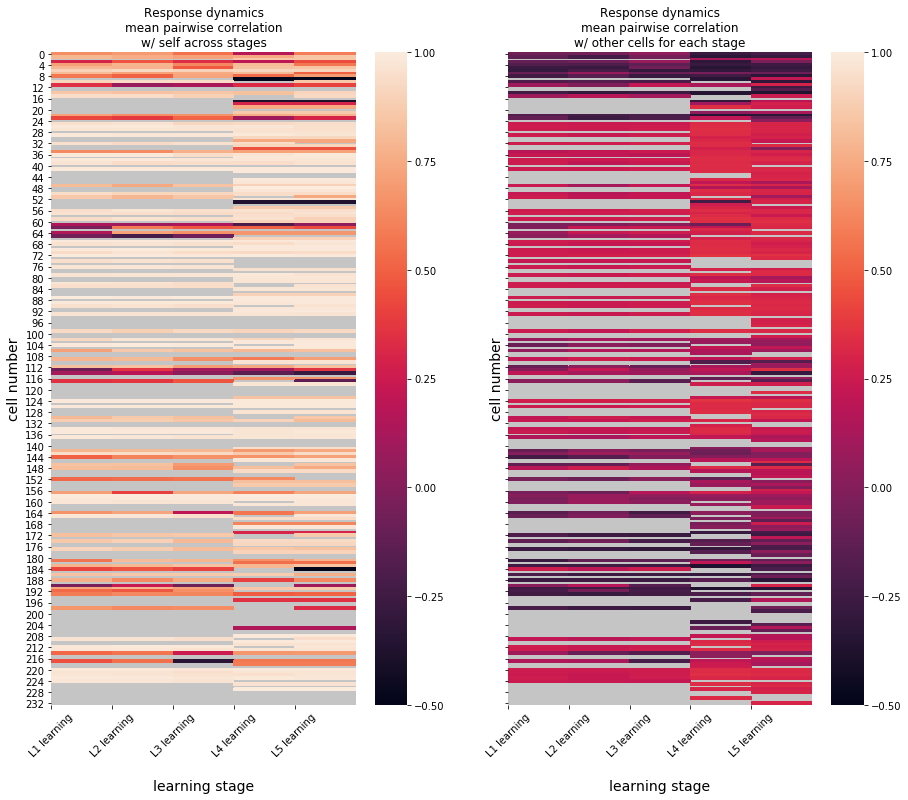

In [272]:
fig, ax = plt.subplots(1,2, figsize=(15,12), sharey=True)
g = sns.heatmap(corr1_avgs, ax=ax[0], vmax=1, vmin=-0.5)
g.set_facecolor('#c5c5c5')
h = sns.heatmap(corr2_avgs, ax=ax[1], vmax=1, vmin=-0.5)
h.set_facecolor('#c5c5c5')

ax[0].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ self across stages')
ax[1].set_title(f'{mouse}: Response dynamics\nmean pairwise correlation\nw/ other cells for each stage')

for axi in ax:
    stim_starts = np.arange(len(stages_to_correlate))
    stim_labels = stages_to_correlate
    axi.set_xticks(stim_starts)
    axi.set_xticklabels(stim_labels, rotation=45)
    axi.set_ylabel('cell number', size=14)
    axi.set_xlabel('\nlearning stage', size=14)